# Initialize all modules and settings for the rest of the analysis

In [1]:
# Import dependencies
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM


In [2]:
# Setup the plt config
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
# Read all the name of the .csv files from the data directory
os.chdir('data')
files = os.listdir()
data = dict()
files

['BinanceCoin.csv',
 'Bitcoin.csv',
 'Cardano.csv',
 'ChainLink.csv',
 'Cosmos.csv',
 'CryptocomCoin.csv',
 'Dogecoin.csv',
 'EOS.csv',
 'Ethereum.csv',
 'Iota.csv',
 'Litecoin.csv',
 'Monero.csv',
 'NEM.csv',
 'Solana.csv',
 'Stellar.csv',
 'Tether.csv',
 'Tron.csv',
 'USDCoin.csv',
 'WrappedBitcoin.csv',
 'XRP.csv']

# Set up the methods which will be used for the rest of the notebook

In [4]:
def show_initial_data(df: pd.DataFrame, name: str):
    ax = df.plot(x='Date', y='Close')
    ax.set_xlabel("Date")
    ax.set_title(f'{name} Closing Values')
    plt.show()


def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)


def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

def comp_train_evaluate_show(df: pd.DataFrame, name: str):
    # Define the sequence length
    SEQ_LEN = 100

    # Instantiate the scaler
    scaler = MinMaxScaler()

    # Get closing data and scale it
    close = df.Close.values.reshape(-1, 1)
    scaled_close = scaler.fit_transform(close)
    scaled_close = scaled_close[~np.isnan(scaled_close)]
    scaled_close = scaled_close.reshape(-1, 1)

    # Seperate data for Algo
    X_train, y_train, X_test, y_test =\
        preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

    # Define information for the Algo
    DROPOUT = 0.2
    WINDOW_SIZE = SEQ_LEN - 1

    # Give the model its data
    model = tf.keras.Sequential()
    model.add(
        Bidirectional(
            LSTM(WINDOW_SIZE, return_sequences=True),
            input_shape=(WINDOW_SIZE, X_train.shape[-1])
        )
    )
    model.add(Dropout(rate=DROPOUT))
    model.add(
        Bidirectional(
            LSTM((WINDOW_SIZE * 2), return_sequences=True)
        )
    )
    model.add(Dropout(rate=DROPOUT))
    model.add(
        Bidirectional(
            LSTM(WINDOW_SIZE, return_sequences=False)
        )
    )
    model.add(Dense(units=1))
    model.add(Activation('linear'))
    BATCH_SIZE = 64
    model.compile(
        loss='mean_squared_error',
        optimizer='adam'
    )

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=5,
        batch_size=BATCH_SIZE,
        shuffle=False,
        validation_split=0.1
    )

    # Plot the data to show loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{name} model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Create the predictive information from the model
    y_hat = model.predict(X_test)
    y_test_inverse = scaler.inverse_transform(y_test)
    y_hat_inverse = scaler.inverse_transform(y_hat)
    
    # Plot the data to show the difference in the Actual vs Prediction
    plt.plot(y_test_inverse, label="Actual Price", color='green')
    plt.plot(y_hat_inverse, label="Predicted Price", color='red')
    plt.title(f'{name} price prediction')
    plt.xlabel('Time [days]')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()

# Run the code for all the different crypto coins

Now working on BinanceCoin


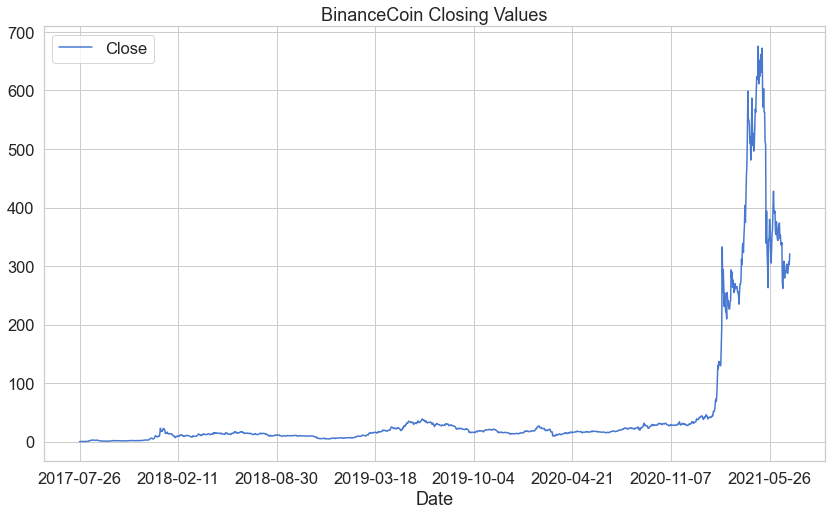

Epoch 1/5
18/18 [==============================] - 22s 731ms/step - loss: 2.7563e-04 - val_loss: 0.1139
Epoch 2/5
18/18 [==============================] - 11s 629ms/step - loss: 1.4845e-04 - val_loss: 0.0685
Epoch 3/5
18/18 [==============================] - 11s 634ms/step - loss: 9.9445e-05 - val_loss: 0.0433
Epoch 4/5
18/18 [==============================] - 12s 647ms/step - loss: 4.7936e-05 - val_loss: 0.0157
Epoch 5/5
18/18 [==============================] - 12s 644ms/step - loss: 4.3157e-05 - val_loss: 0.0548


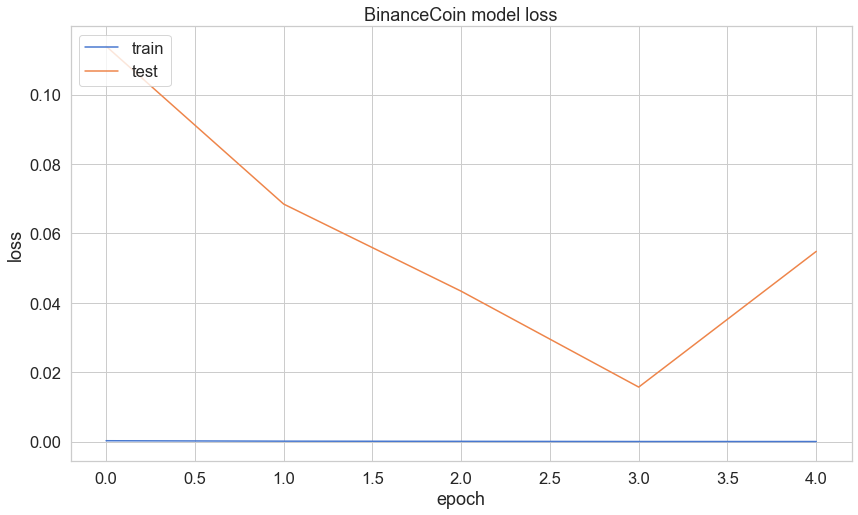

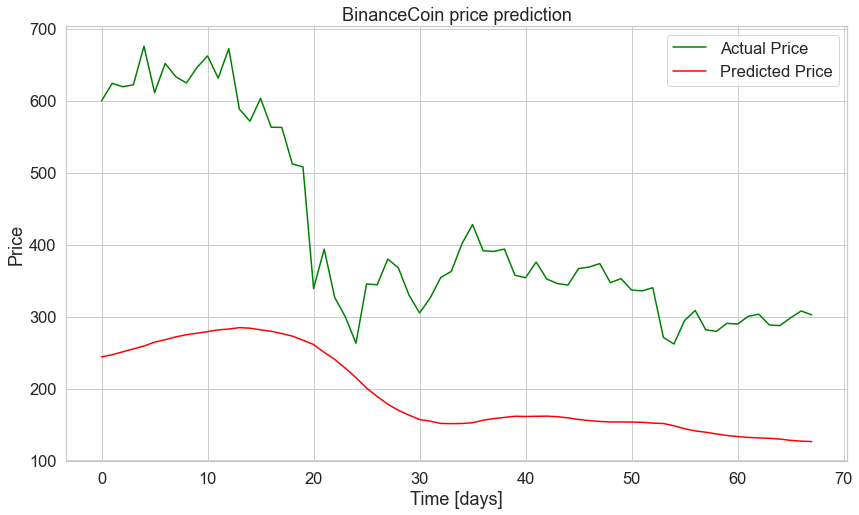







Now working on Bitcoin


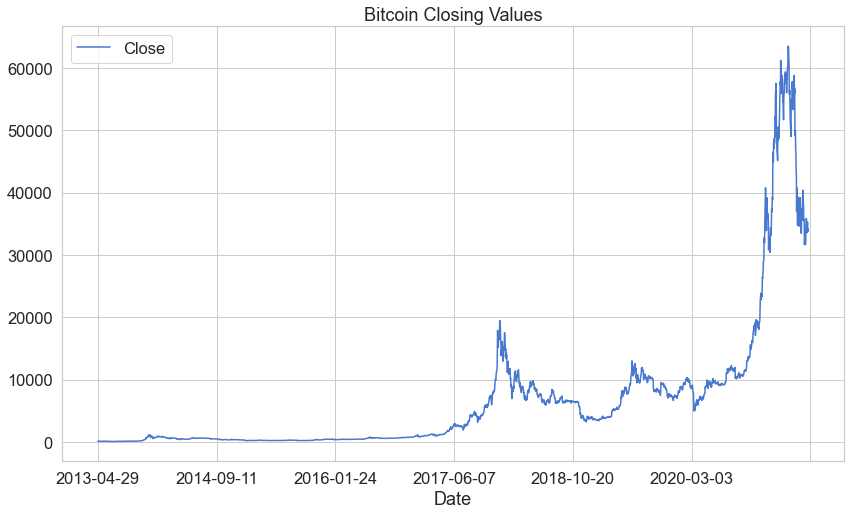

Epoch 1/5
39/39 [==============================] - 40s 799ms/step - loss: 0.0019 - val_loss: 0.0159
Epoch 2/5
39/39 [==============================] - 27s 687ms/step - loss: 0.0030 - val_loss: 0.0141
Epoch 3/5
39/39 [==============================] - 28s 724ms/step - loss: 7.7148e-04 - val_loss: 0.0032
Epoch 4/5
39/39 [==============================] - 28s 730ms/step - loss: 3.2009e-04 - val_loss: 0.0039
Epoch 5/5
39/39 [==============================] - 29s 755ms/step - loss: 6.7054e-04 - val_loss: 0.0030


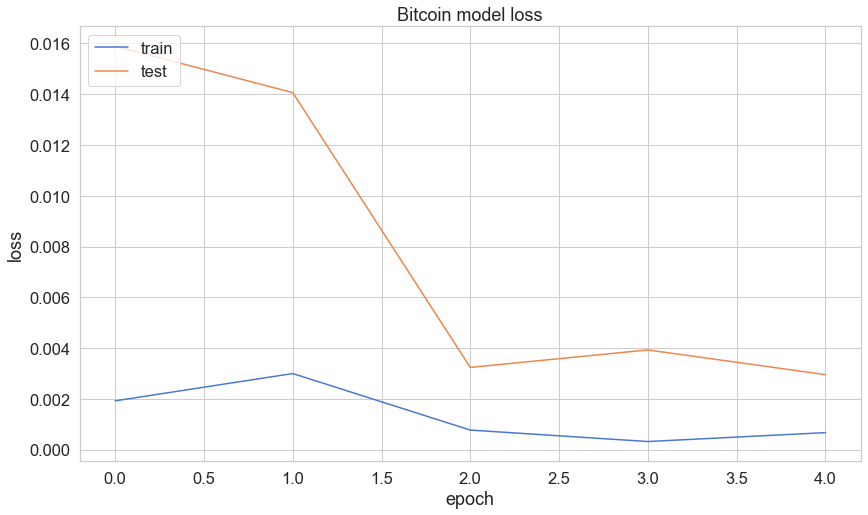

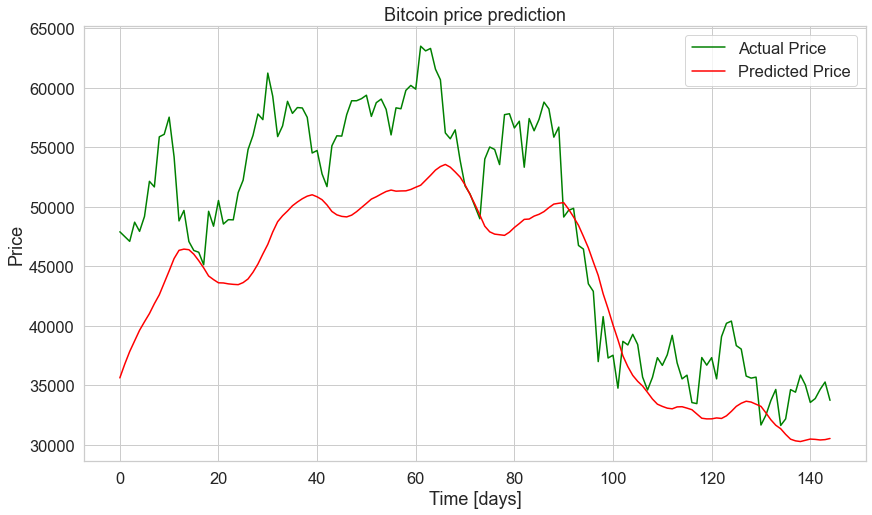







Now working on Cardano


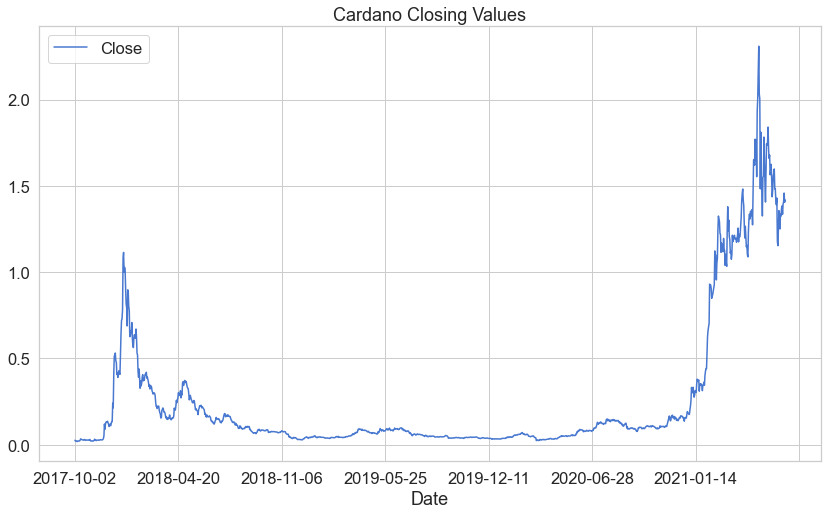

Epoch 1/5
18/18 [==============================] - 28s 1s/step - loss: 0.0039 - val_loss: 0.1029
Epoch 2/5
18/18 [==============================] - 13s 720ms/step - loss: 0.0031 - val_loss: 0.0336
Epoch 3/5
18/18 [==============================] - 13s 695ms/step - loss: 0.0011 - val_loss: 0.0235
Epoch 4/5
18/18 [==============================] - 13s 698ms/step - loss: 8.9683e-04 - val_loss: 0.0371
Epoch 5/5
18/18 [==============================] - 13s 701ms/step - loss: 0.0011 - val_loss: 0.1251


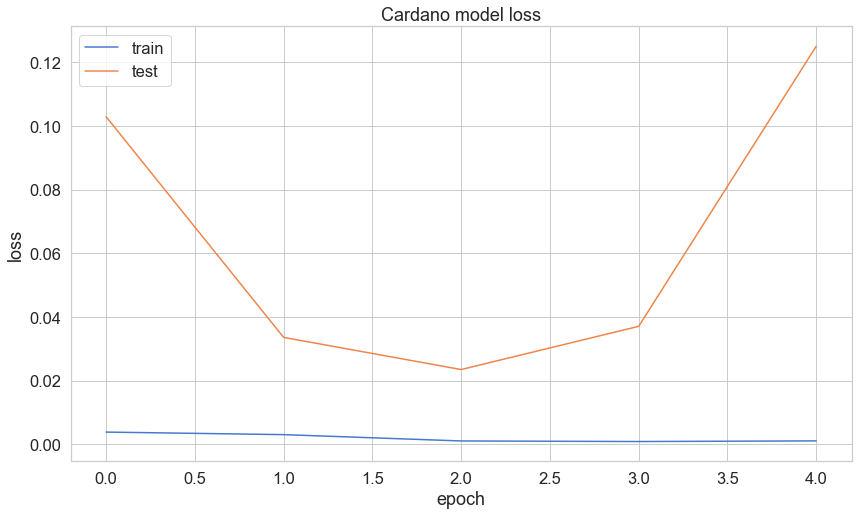

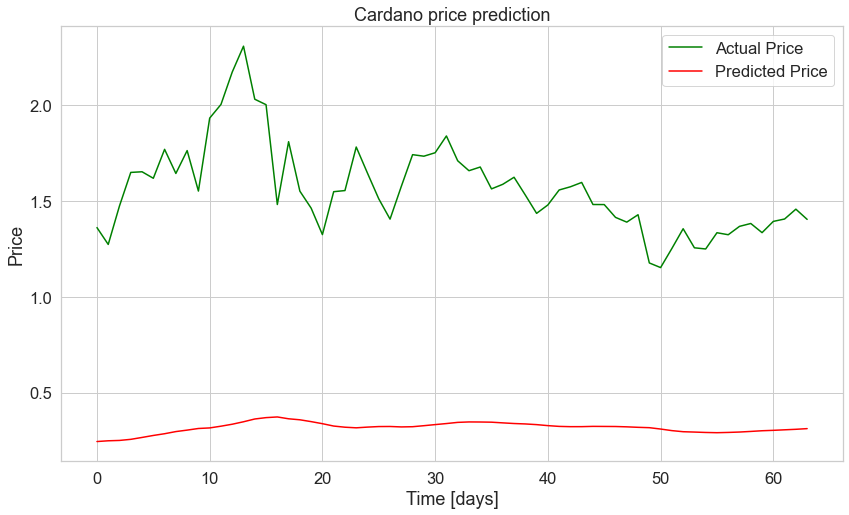







Now working on ChainLink


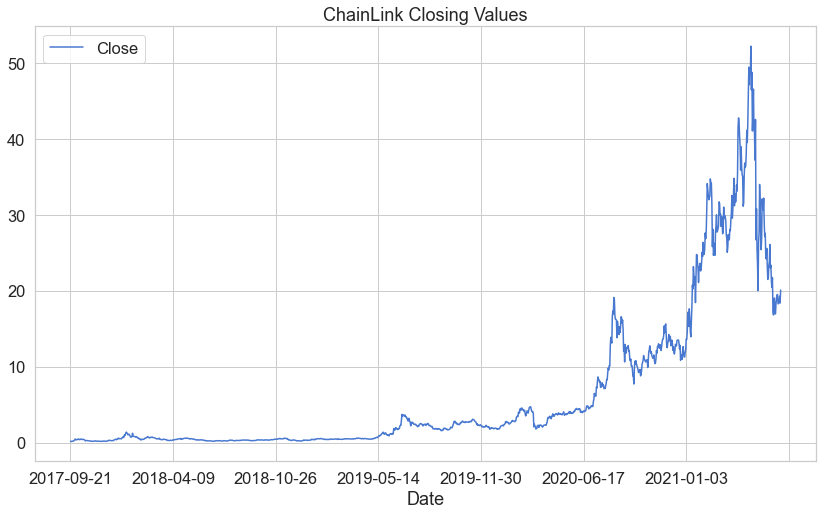

Epoch 1/5
18/18 [==============================] - 25s 907ms/step - loss: 0.0014 - val_loss: 0.0531
Epoch 2/5
18/18 [==============================] - 12s 676ms/step - loss: 0.0053 - val_loss: 0.0118
Epoch 3/5
18/18 [==============================] - 13s 714ms/step - loss: 0.0082 - val_loss: 0.0266
Epoch 4/5
18/18 [==============================] - 13s 719ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 5/5
18/18 [==============================] - 13s 734ms/step - loss: 0.0010 - val_loss: 0.0051


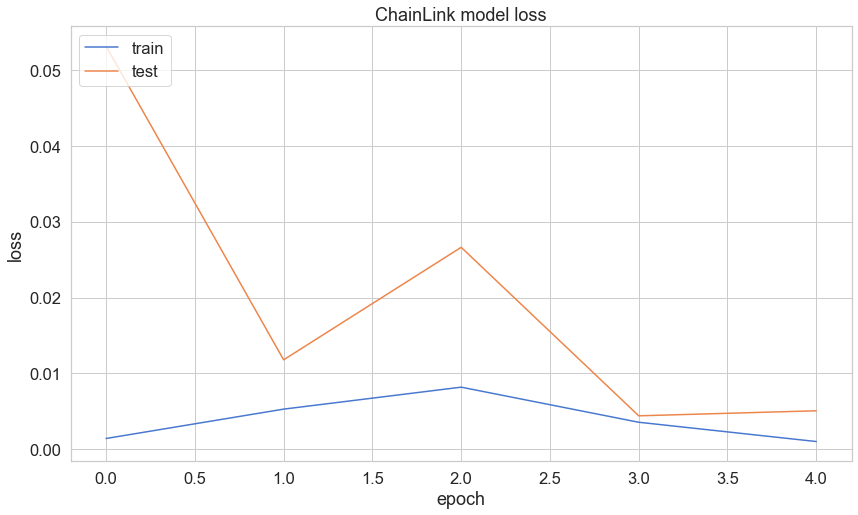

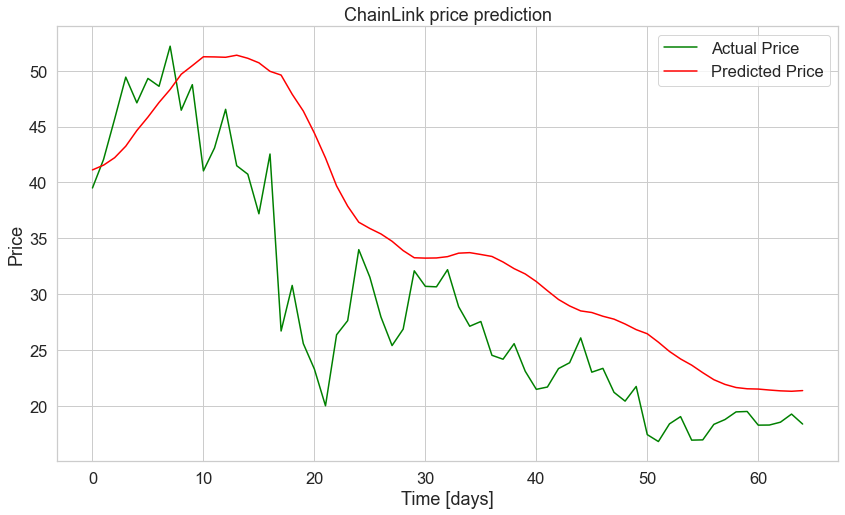







Now working on Cosmos


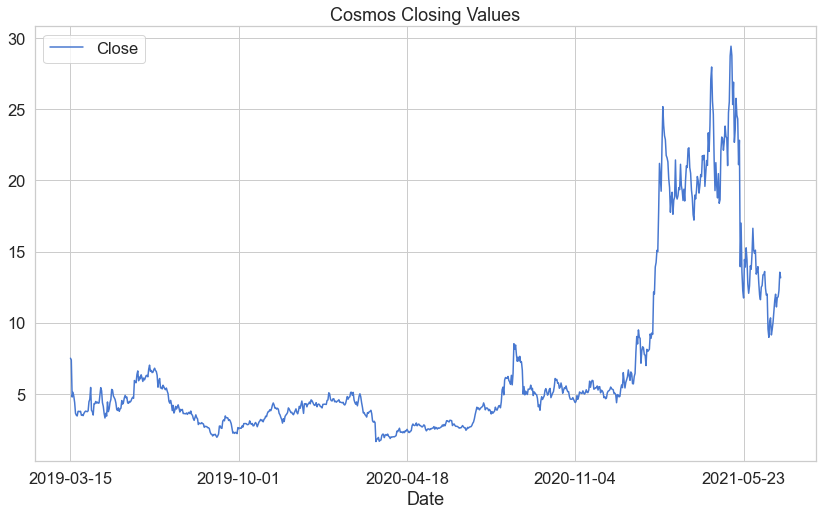

Epoch 1/5
10/10 [==============================] - 22s 1s/step - loss: 0.0036 - val_loss: 0.0166
Epoch 2/5
10/10 [==============================] - 10s 1s/step - loss: 0.0114 - val_loss: 0.0850
Epoch 3/5
10/10 [==============================] - 10s 984ms/step - loss: 0.0060 - val_loss: 0.0151
Epoch 4/5
10/10 [==============================] - 10s 976ms/step - loss: 0.0128 - val_loss: 0.1267
Epoch 5/5
10/10 [==============================] - 10s 976ms/step - loss: 0.0066 - val_loss: 0.0160


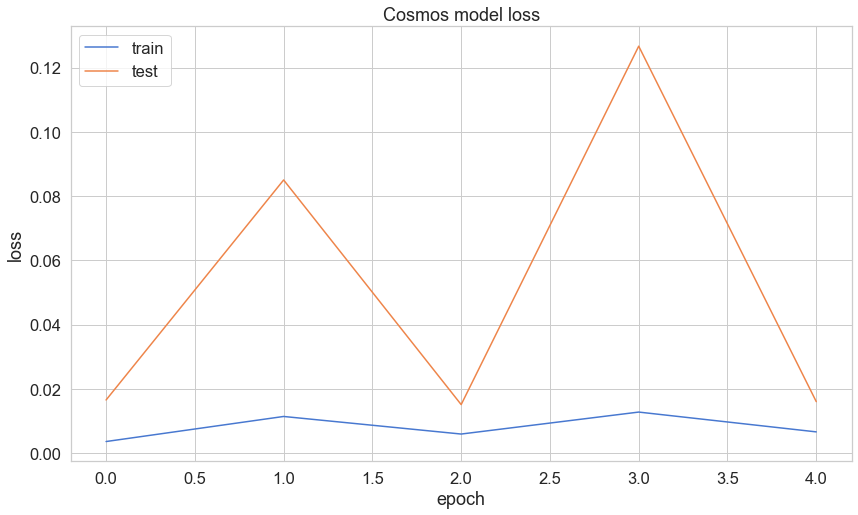

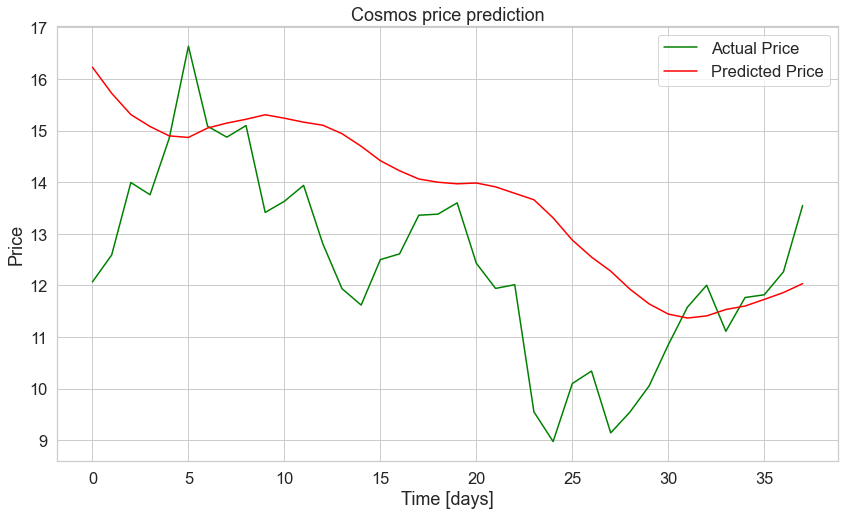







Now working on CryptocomCoin


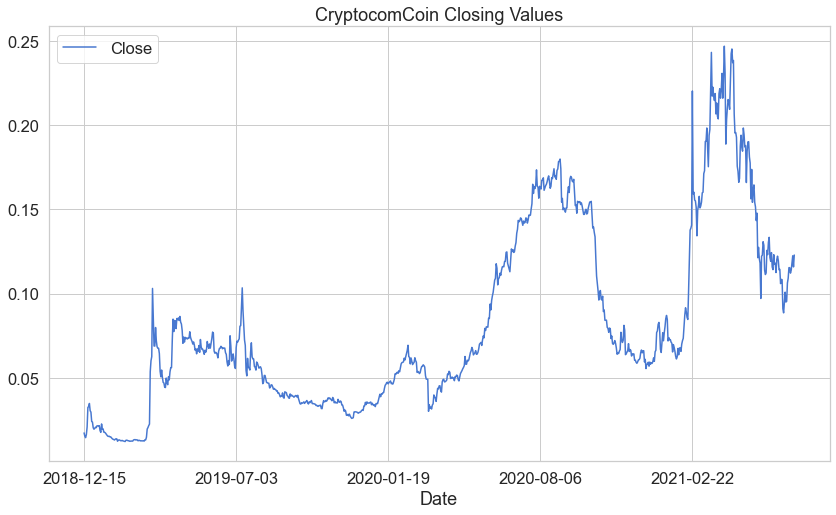

Epoch 1/5
12/12 [==============================] - 24s 1s/step - loss: 0.0369 - val_loss: 0.0776
Epoch 2/5
12/12 [==============================] - 12s 987ms/step - loss: 0.0204 - val_loss: 0.0372
Epoch 3/5
12/12 [==============================] - 11s 938ms/step - loss: 0.0078 - val_loss: 0.0206
Epoch 4/5
12/12 [==============================] - 11s 914ms/step - loss: 0.0051 - val_loss: 0.0274
Epoch 5/5
12/12 [==============================] - 11s 924ms/step - loss: 0.0076 - val_loss: 0.0090


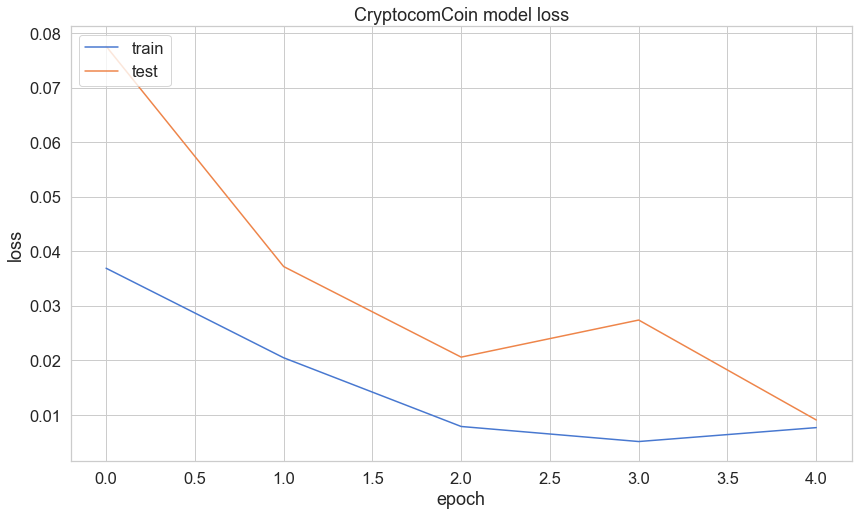

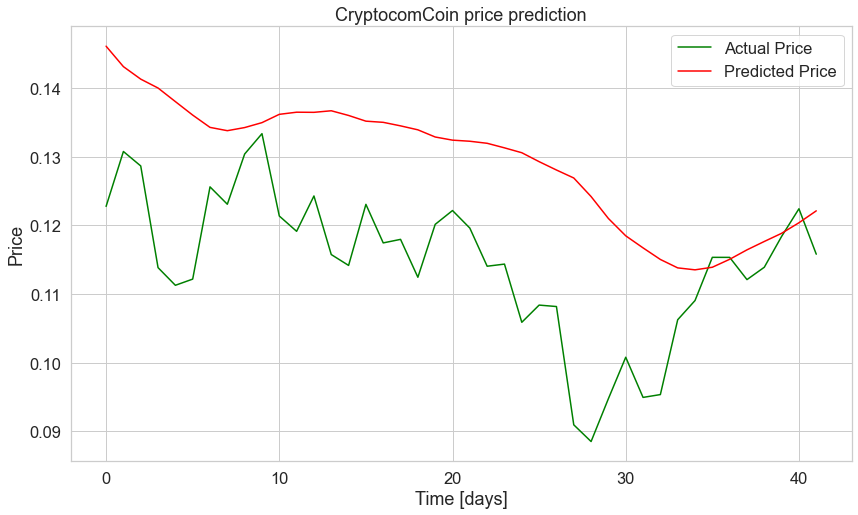







Now working on Dogecoin


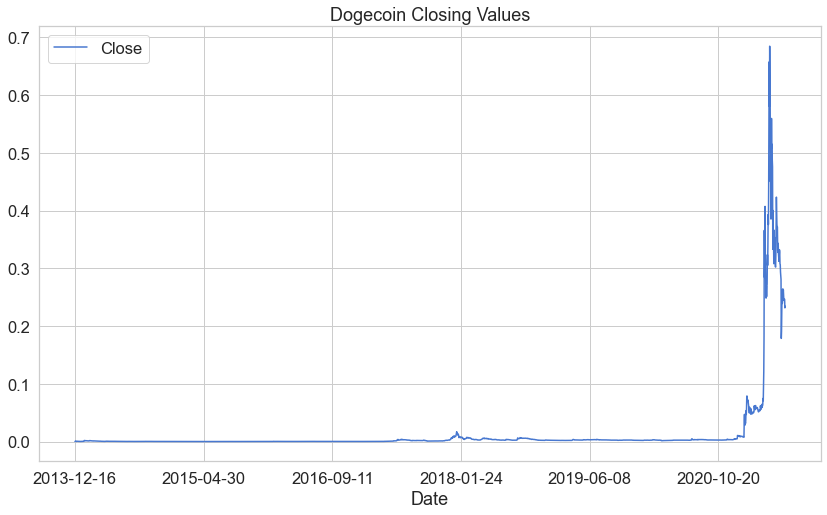

Epoch 1/5
36/36 [==============================] - 50s 1s/step - loss: 1.0549e-04 - val_loss: 6.2391e-04
Epoch 2/5
36/36 [==============================] - 38s 1s/step - loss: 1.0412e-05 - val_loss: 5.5612e-04
Epoch 3/5
36/36 [==============================] - 40s 1s/step - loss: 1.5598e-05 - val_loss: 5.7072e-04
Epoch 4/5
36/36 [==============================] - 39s 1s/step - loss: 1.0801e-05 - val_loss: 5.7388e-04
Epoch 5/5
36/36 [==============================] - 39s 1s/step - loss: 8.3662e-06 - val_loss: 5.4197e-04


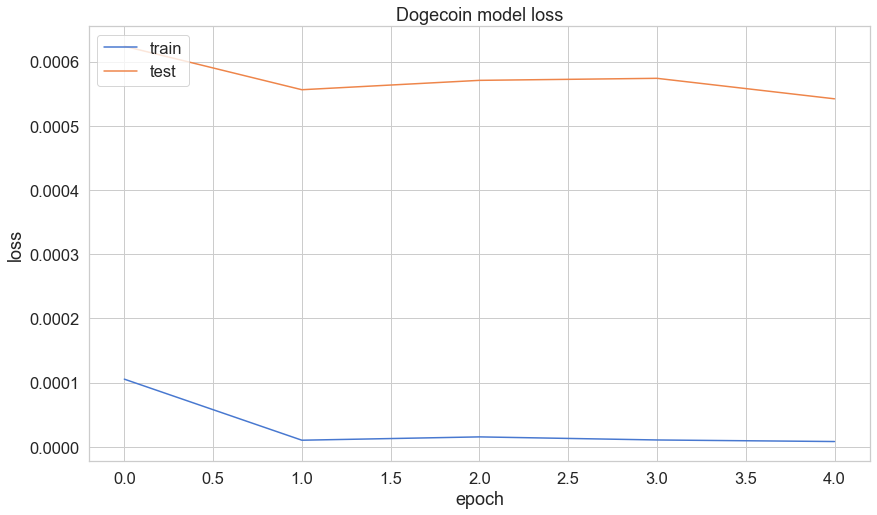

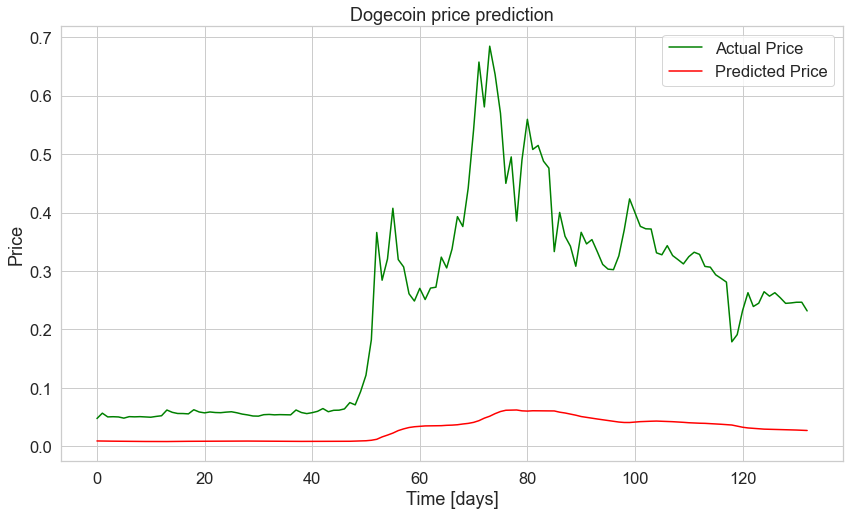







Now working on EOS


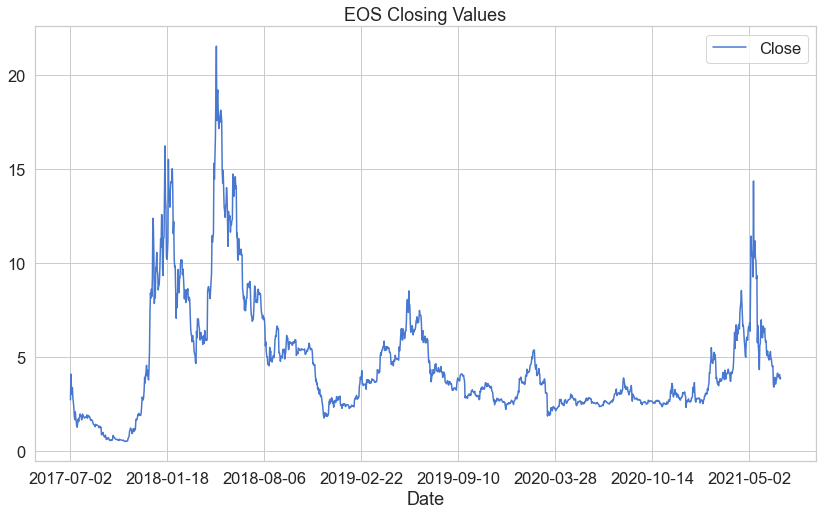

Epoch 1/5
19/19 [==============================] - 24s 825ms/step - loss: 0.0109 - val_loss: 0.0023
Epoch 2/5
19/19 [==============================] - 26s 1s/step - loss: 0.0095 - val_loss: 0.0020
Epoch 3/5
19/19 [==============================] - 25s 1s/step - loss: 0.0094 - val_loss: 0.0016
Epoch 4/5
19/19 [==============================] - 25s 1s/step - loss: 0.0058 - val_loss: 0.0045
Epoch 5/5
19/19 [==============================] - 25s 1s/step - loss: 0.0075 - val_loss: 0.0038


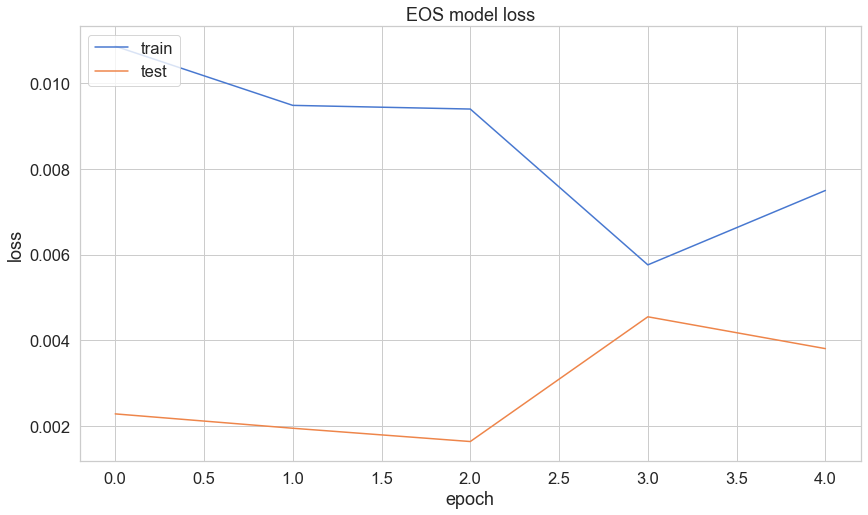

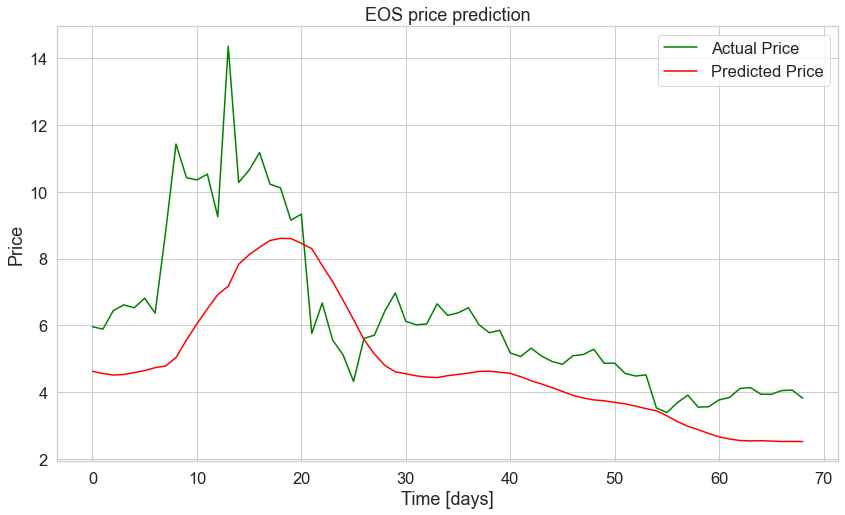







Now working on Ethereum


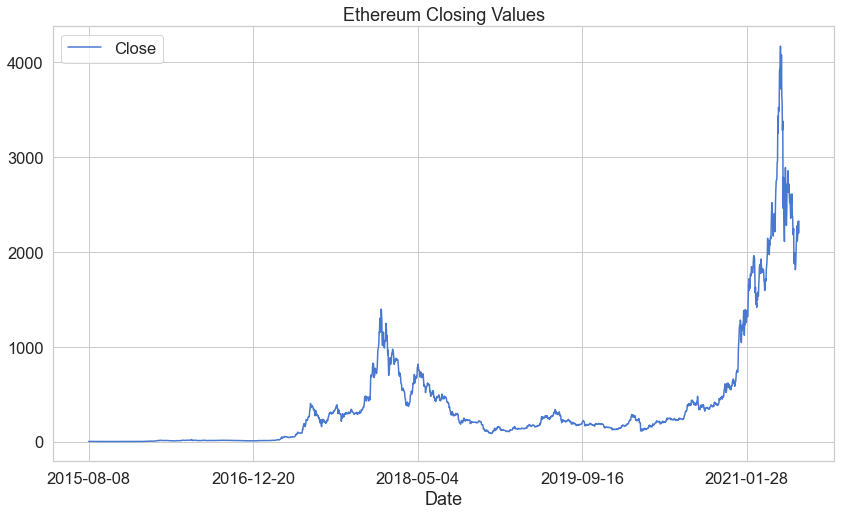

Epoch 1/5
28/28 [==============================] - 51s 1s/step - loss: 0.0011 - val_loss: 0.0297
Epoch 2/5
28/28 [==============================] - 38s 1s/step - loss: 0.0027 - val_loss: 0.0274
Epoch 3/5
28/28 [==============================] - 38s 1s/step - loss: 0.0013 - val_loss: 0.0065
Epoch 4/5
28/28 [==============================] - 38s 1s/step - loss: 7.2207e-04 - val_loss: 0.0111
Epoch 5/5
28/28 [==============================] - 37s 1s/step - loss: 2.0233e-04 - val_loss: 8.3272e-04


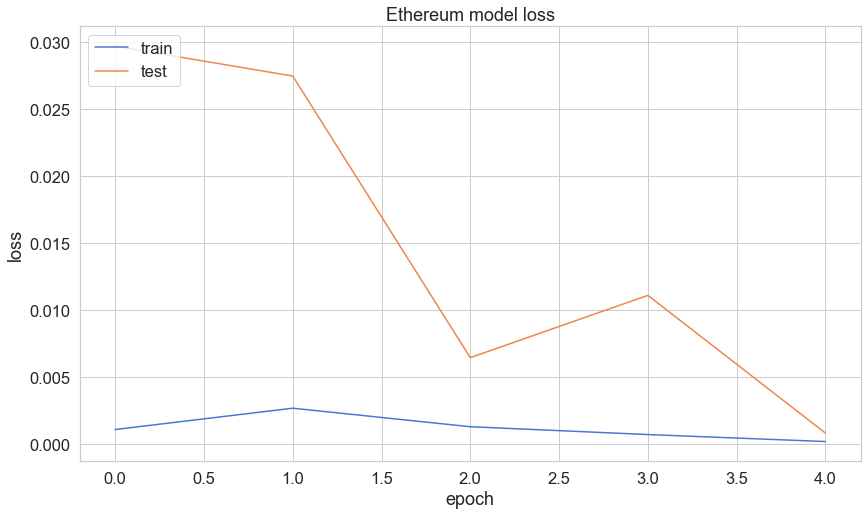

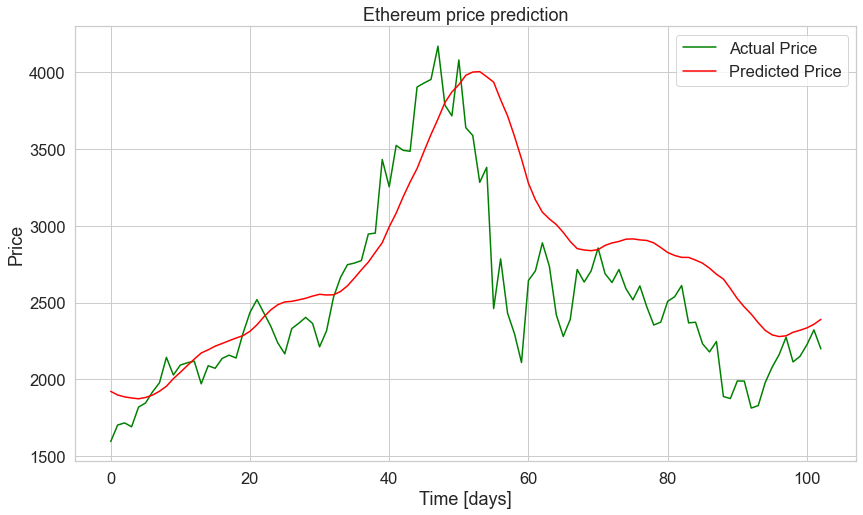







Now working on Iota


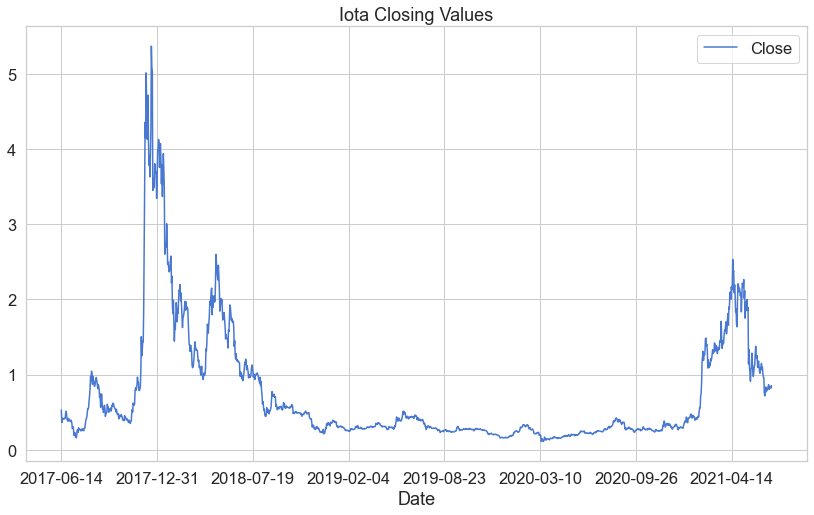

Epoch 1/5
19/19 [==============================] - 34s 1s/step - loss: 0.0213 - val_loss: 0.0262
Epoch 2/5
19/19 [==============================] - 19s 1s/step - loss: 0.0254 - val_loss: 0.0024
Epoch 3/5
19/19 [==============================] - 19s 993ms/step - loss: 0.0033 - val_loss: 0.0382
Epoch 4/5
19/19 [==============================] - 19s 991ms/step - loss: 0.0276 - val_loss: 0.0016
Epoch 5/5
19/19 [==============================] - 19s 985ms/step - loss: 0.0034 - val_loss: 0.0376


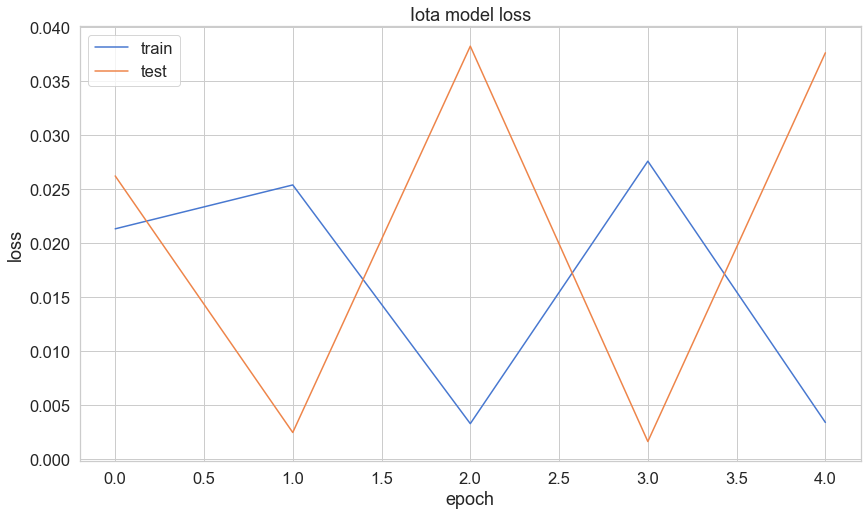

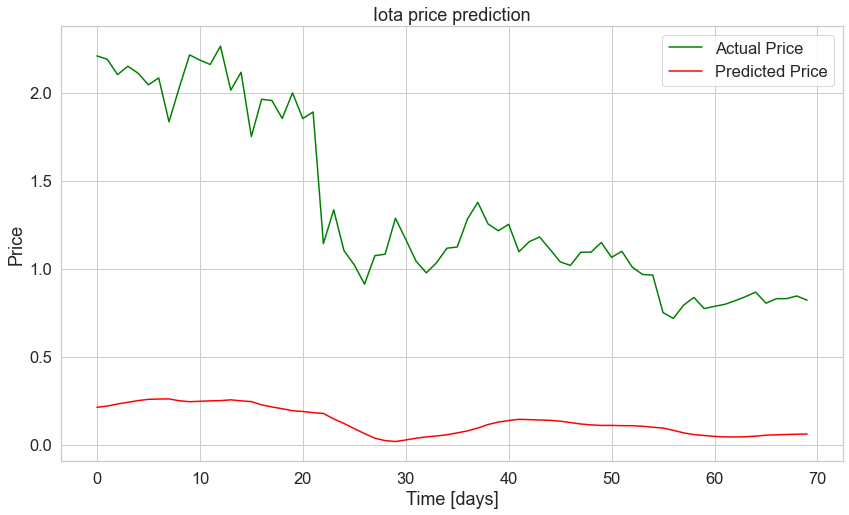







Now working on Litecoin


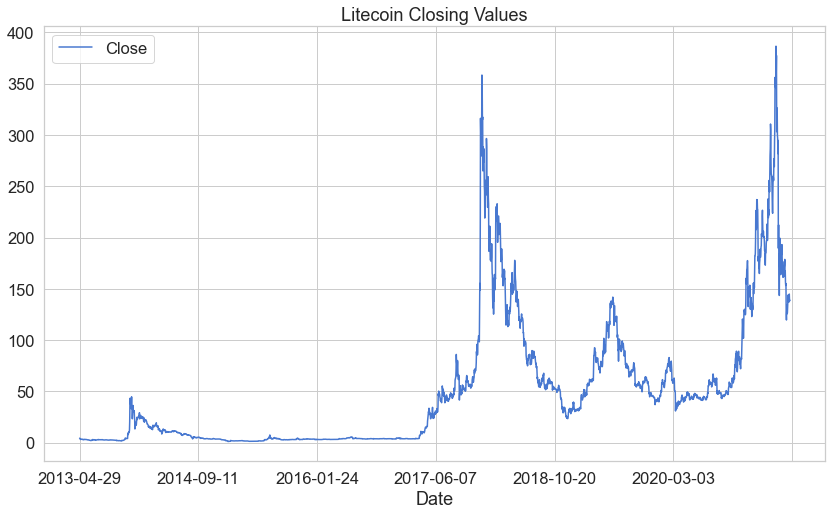

Epoch 1/5
39/39 [==============================] - 55s 1s/step - loss: 0.0035 - val_loss: 0.0010
Epoch 2/5
39/39 [==============================] - 43s 1s/step - loss: 0.0023 - val_loss: 0.0041
Epoch 3/5
39/39 [==============================] - 44s 1s/step - loss: 0.0100 - val_loss: 5.5648e-04
Epoch 4/5
39/39 [==============================] - 44s 1s/step - loss: 0.0025 - val_loss: 0.0031
Epoch 5/5
39/39 [==============================] - 44s 1s/step - loss: 0.0031 - val_loss: 9.5100e-04


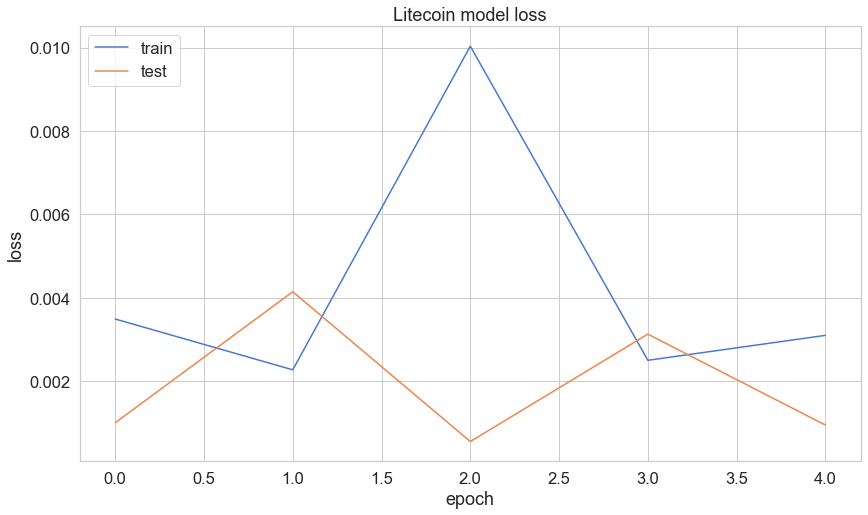

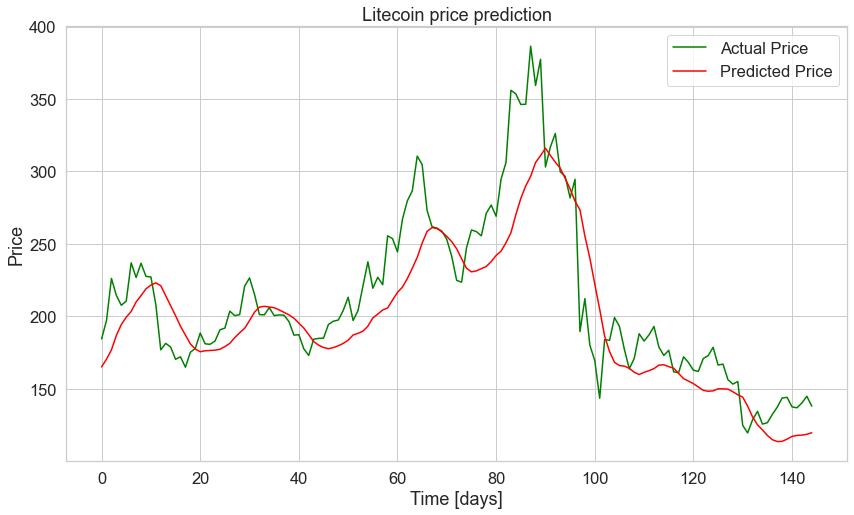







Now working on Monero


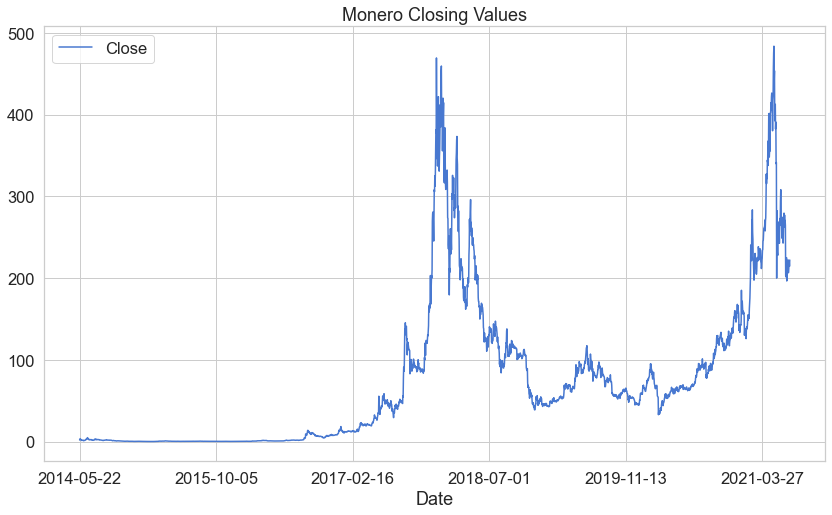

Epoch 1/5
34/34 [==============================] - 51s 1s/step - loss: 0.0091 - val_loss: 0.0076
Epoch 2/5
34/34 [==============================] - 39s 1s/step - loss: 0.0228 - val_loss: 0.0180
Epoch 3/5
34/34 [==============================] - 39s 1s/step - loss: 0.0047 - val_loss: 0.0085
Epoch 4/5
34/34 [==============================] - 39s 1s/step - loss: 0.0066 - val_loss: 0.0027
Epoch 5/5
34/34 [==============================] - 39s 1s/step - loss: 0.0026 - val_loss: 0.0032


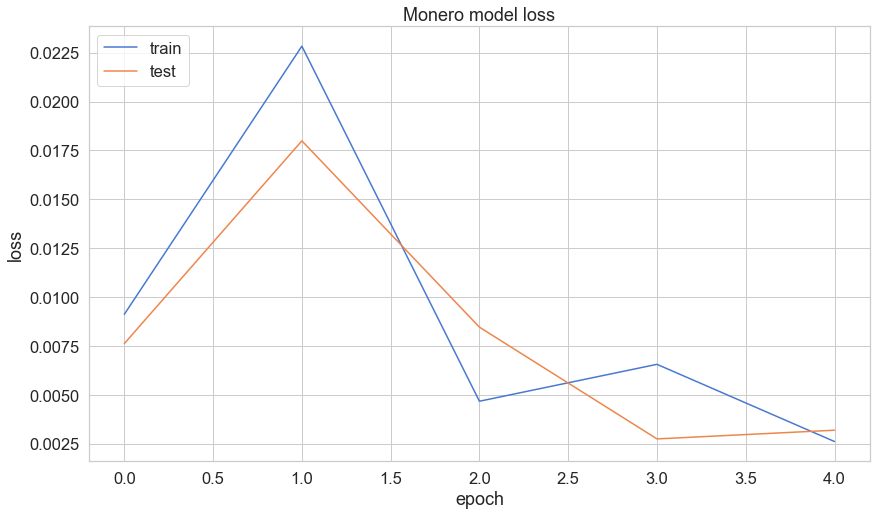

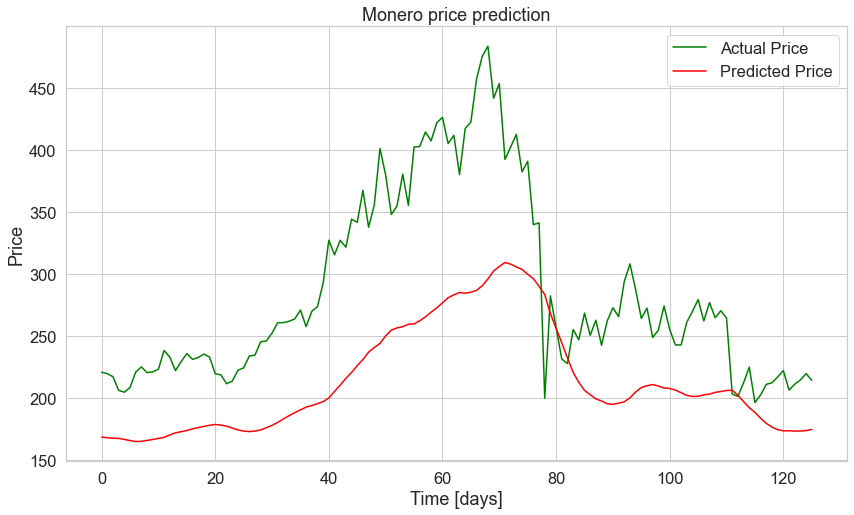







Now working on NEM


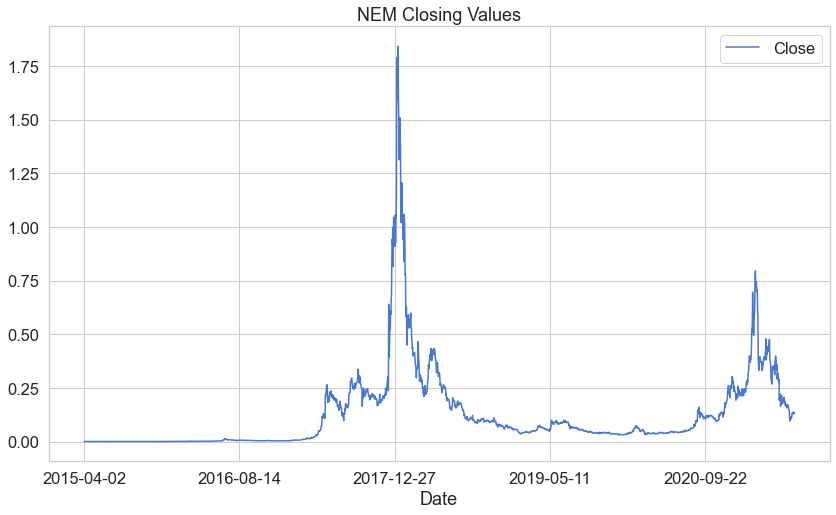

Epoch 1/5
30/30 [==============================] - 43s 1s/step - loss: 0.0082 - val_loss: 0.0159
Epoch 2/5
30/30 [==============================] - 28s 928ms/step - loss: 0.0113 - val_loss: 0.0031
Epoch 3/5
30/30 [==============================] - 29s 960ms/step - loss: 0.0020 - val_loss: 0.0191
Epoch 4/5
30/30 [==============================] - 29s 965ms/step - loss: 0.0139 - val_loss: 0.0091
Epoch 5/5
30/30 [==============================] - 29s 958ms/step - loss: 0.0047 - val_loss: 0.0091


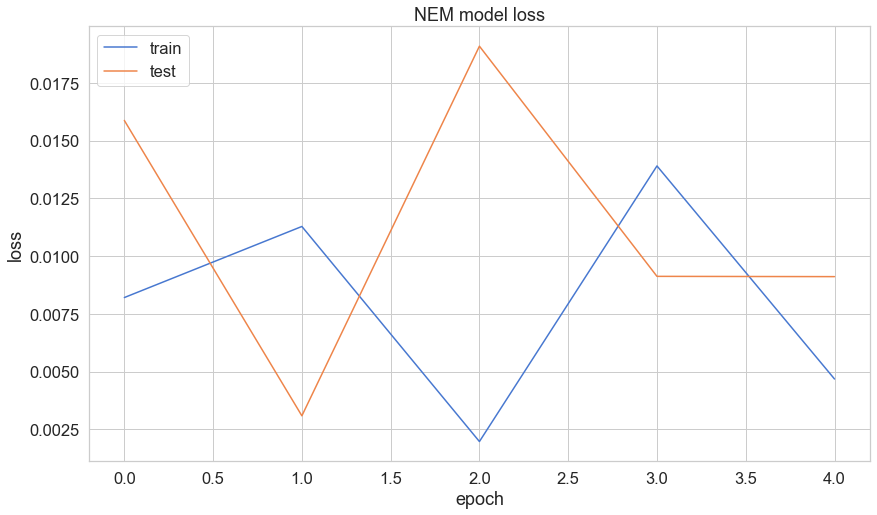

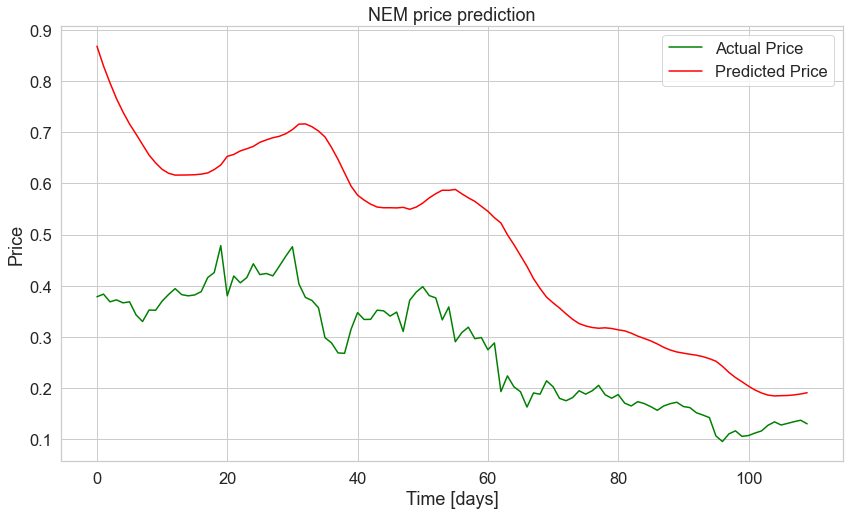







Now working on Solana


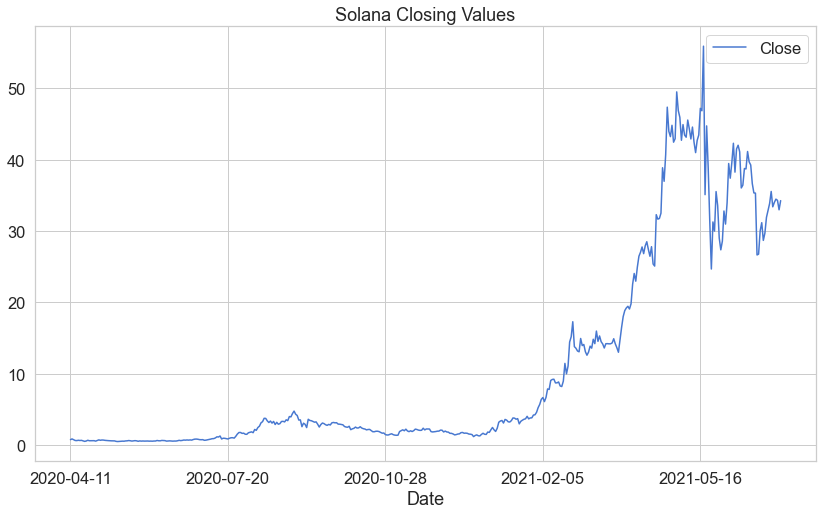

Epoch 1/5
5/5 [==============================] - 17s 2s/step - loss: 0.0206 - val_loss: 0.0162
Epoch 2/5
5/5 [==============================] - 6s 1s/step - loss: 0.0468 - val_loss: 0.0849
Epoch 3/5
5/5 [==============================] - 6s 1s/step - loss: 0.0399 - val_loss: 0.1922
Epoch 4/5
5/5 [==============================] - 6s 1s/step - loss: 0.0235 - val_loss: 0.1123
Epoch 5/5
5/5 [==============================] - 6s 1s/step - loss: 0.0114 - val_loss: 0.0206


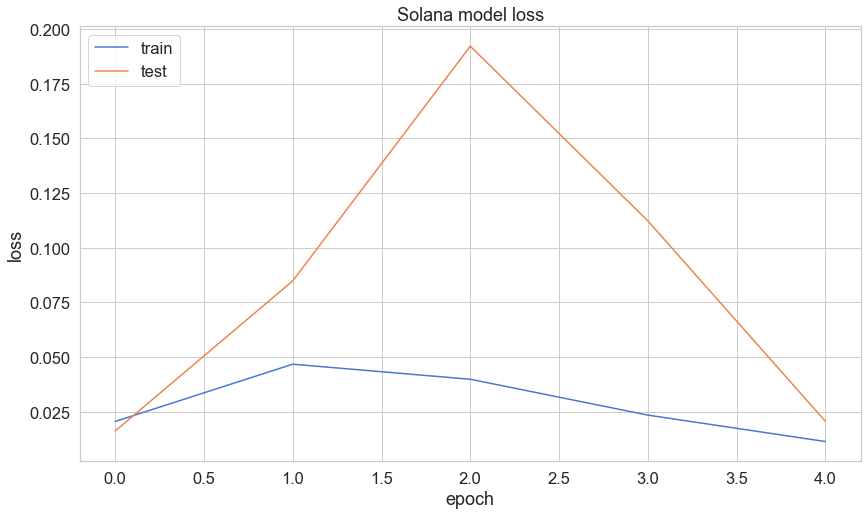

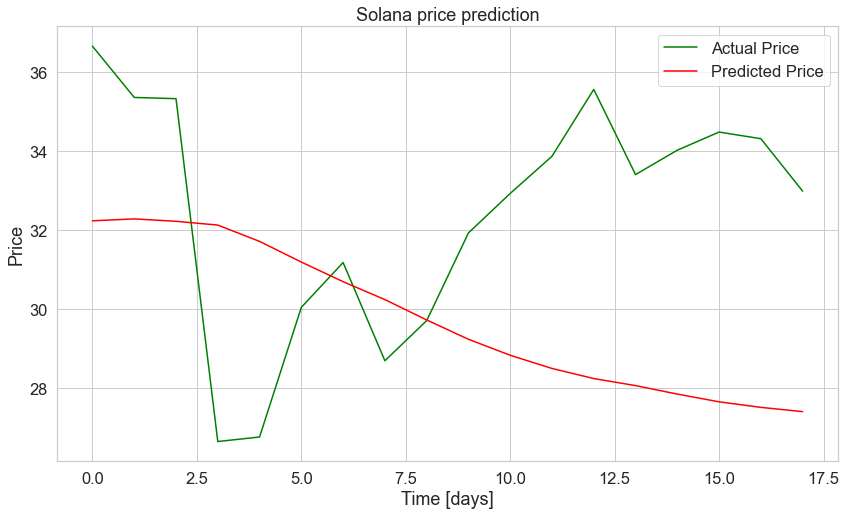







Now working on Stellar


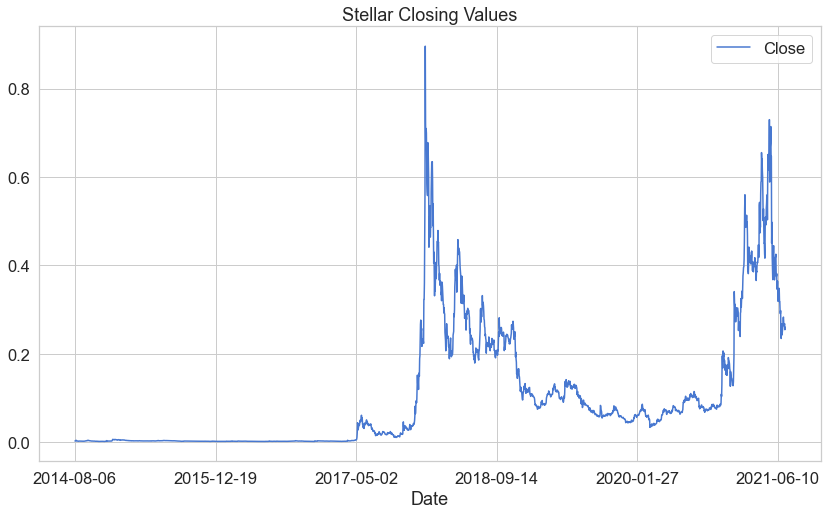

Epoch 1/5
33/33 [==============================] - 56s 1s/step - loss: 0.0081 - val_loss: 0.0234
Epoch 2/5
33/33 [==============================] - 41s 1s/step - loss: 0.0110 - val_loss: 0.0227
Epoch 3/5
33/33 [==============================] - 40s 1s/step - loss: 0.0090 - val_loss: 0.0092
Epoch 4/5
33/33 [==============================] - 40s 1s/step - loss: 0.0041 - val_loss: 0.0082
Epoch 5/5
33/33 [==============================] - 40s 1s/step - loss: 0.0038 - val_loss: 0.0137


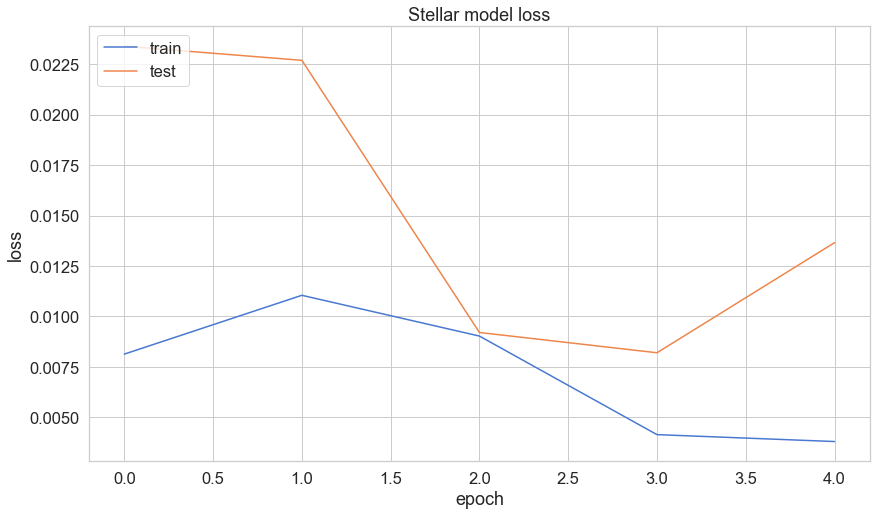

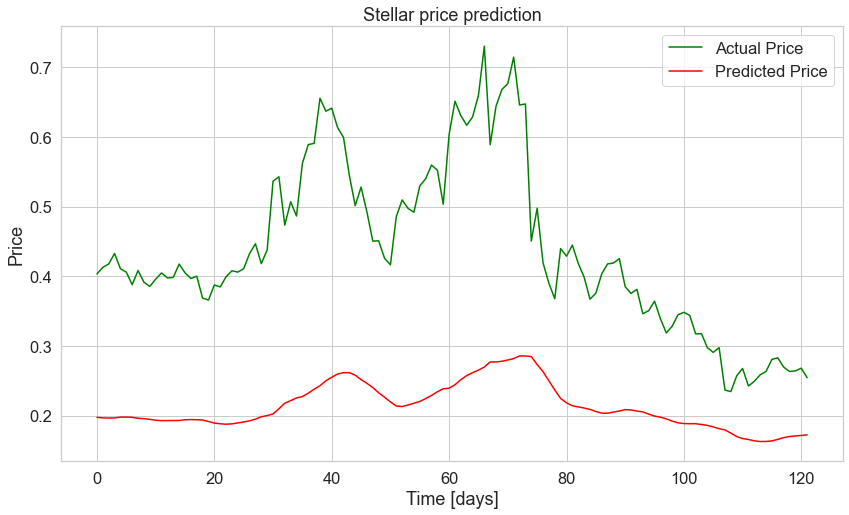







Now working on Tether


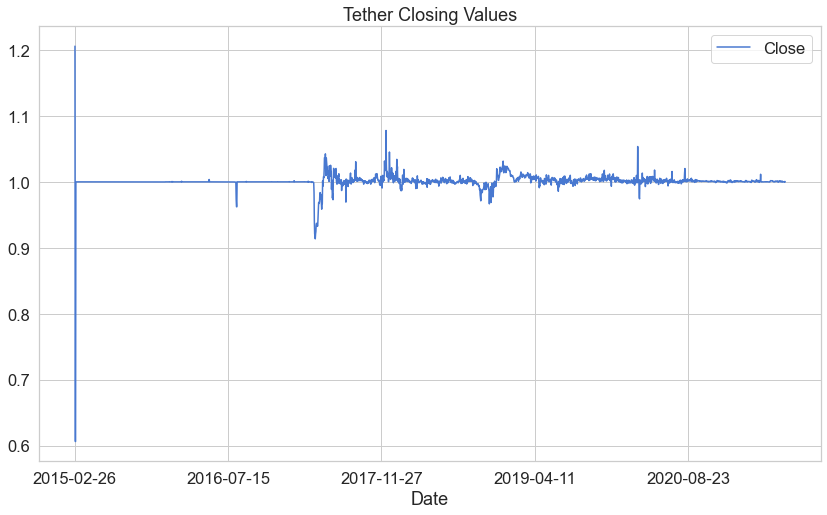

Epoch 1/5
30/30 [==============================] - 45s 1s/step - loss: 0.0366 - val_loss: 0.0019
Epoch 2/5
30/30 [==============================] - 31s 1s/step - loss: 8.1222e-04 - val_loss: 1.5518e-04
Epoch 3/5
30/30 [==============================] - 32s 1s/step - loss: 3.2796e-04 - val_loss: 1.1278e-05
Epoch 4/5
30/30 [==============================] - 31s 1s/step - loss: 3.3431e-04 - val_loss: 4.8413e-06
Epoch 5/5
30/30 [==============================] - 31s 1s/step - loss: 3.0459e-04 - val_loss: 2.4481e-06


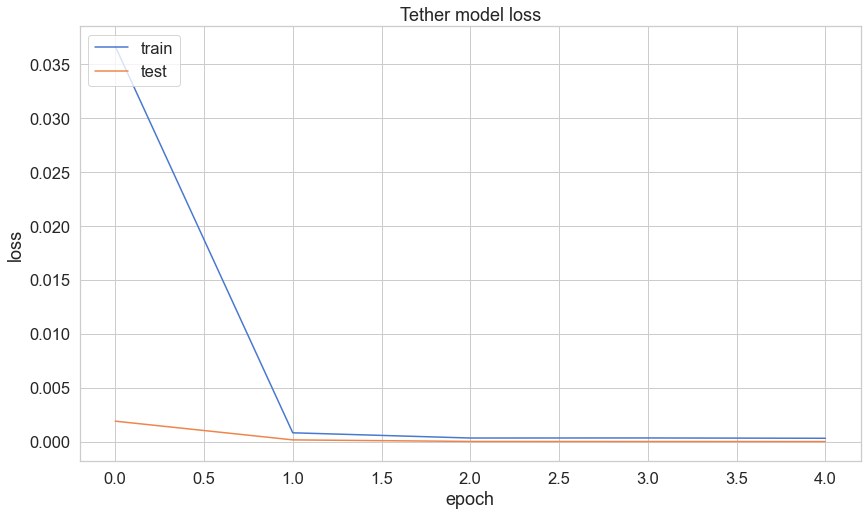

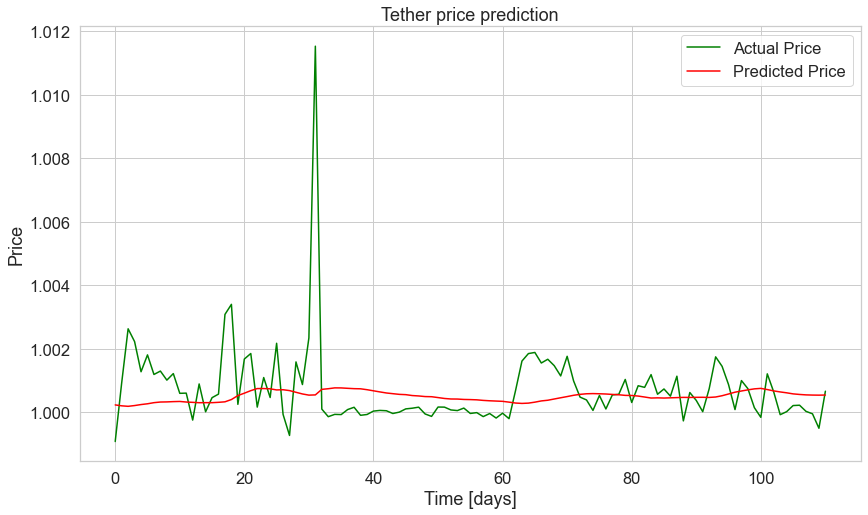







Now working on Tron


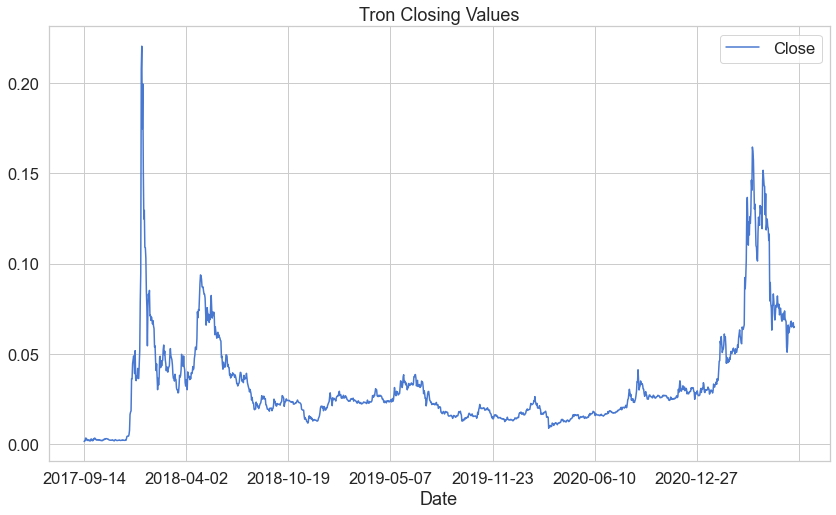

Epoch 1/5
18/18 [==============================] - 32s 1s/step - loss: 0.0109 - val_loss: 0.0432
Epoch 2/5
18/18 [==============================] - 20s 1s/step - loss: 0.0071 - val_loss: 0.0236
Epoch 3/5
18/18 [==============================] - 19s 1s/step - loss: 0.0054 - val_loss: 0.0074
Epoch 4/5
18/18 [==============================] - 20s 1s/step - loss: 0.0027 - val_loss: 0.0078
Epoch 5/5
18/18 [==============================] - 19s 1s/step - loss: 0.0022 - val_loss: 0.0053


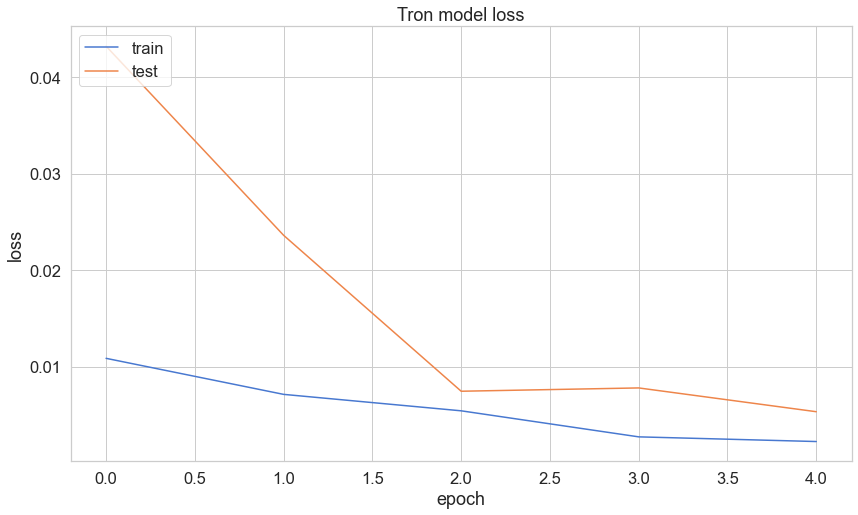

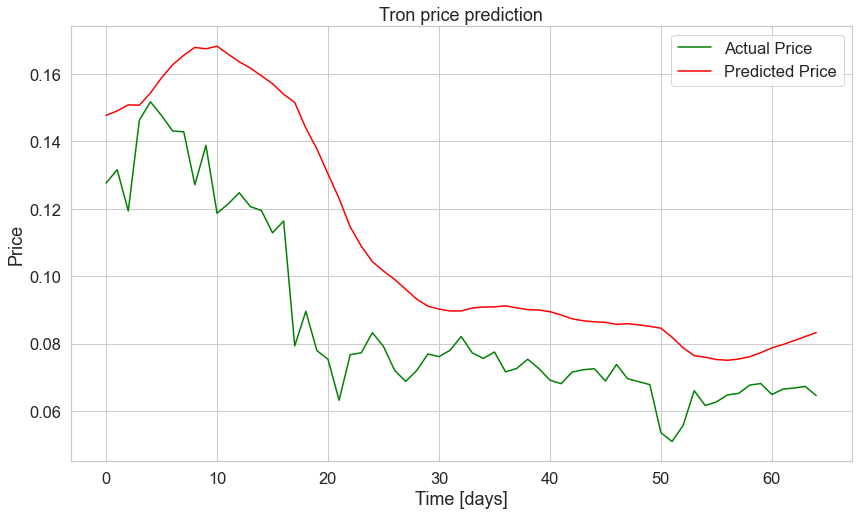







Now working on USDCoin


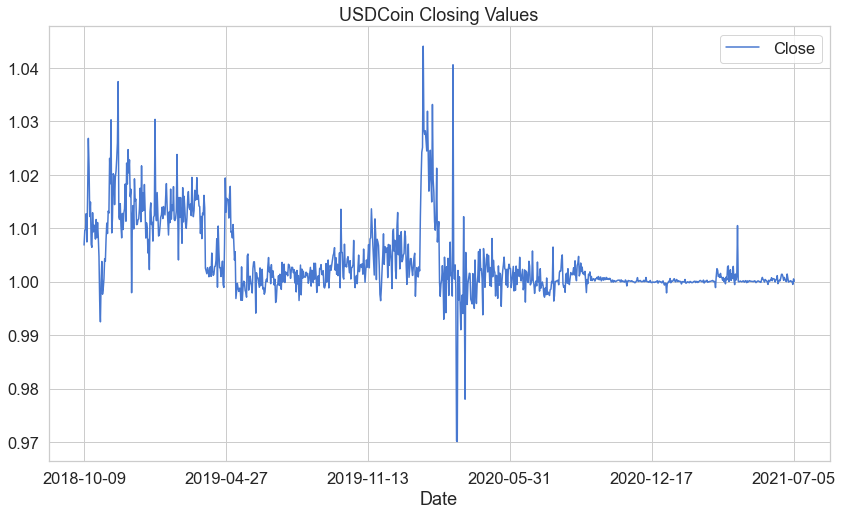

Epoch 1/5
13/13 [==============================] - 26s 1s/step - loss: 0.0340 - val_loss: 5.6429e-04
Epoch 2/5
13/13 [==============================] - 13s 1s/step - loss: 0.0059 - val_loss: 9.6054e-04
Epoch 3/5
13/13 [==============================] - 13s 1s/step - loss: 0.0053 - val_loss: 0.0012
Epoch 4/5
13/13 [==============================] - 13s 1s/step - loss: 0.0050 - val_loss: 7.3736e-04
Epoch 5/5
13/13 [==============================] - 13s 1s/step - loss: 0.0048 - val_loss: 3.5372e-04


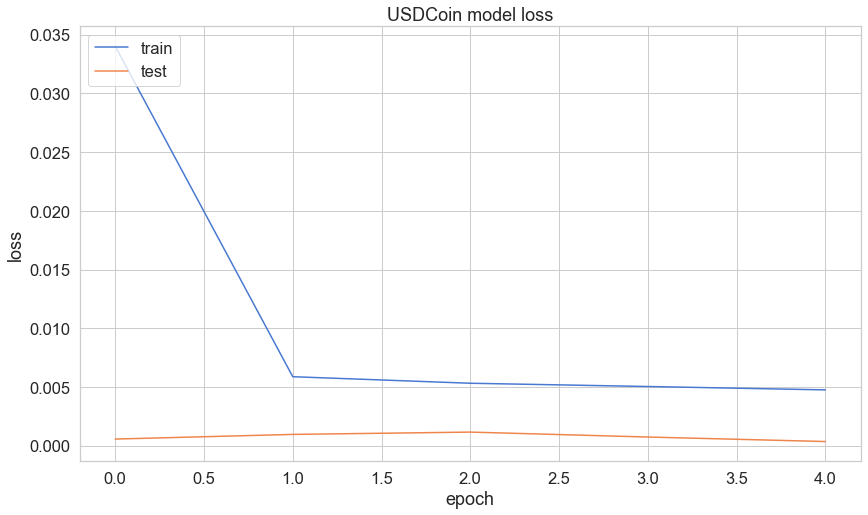

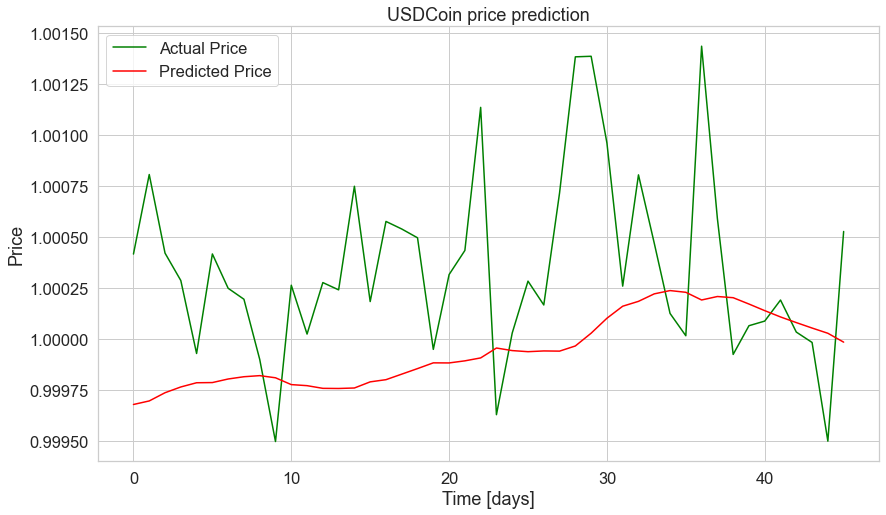







Now working on WrappedBitcoin


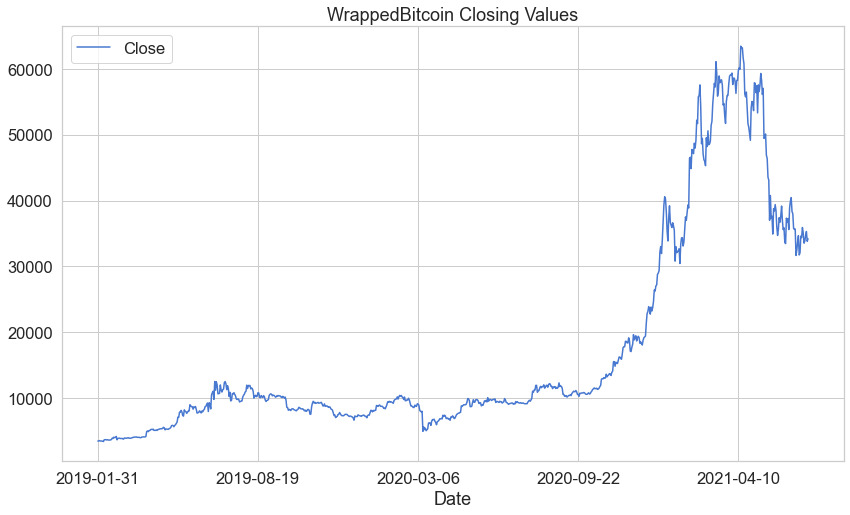

Epoch 1/5
11/11 [==============================] - 24s 1s/step - loss: 0.0171 - val_loss: 0.0102
Epoch 2/5
11/11 [==============================] - 10s 939ms/step - loss: 0.0183 - val_loss: 0.0291
Epoch 3/5
11/11 [==============================] - 10s 933ms/step - loss: 0.0390 - val_loss: 0.3227
Epoch 4/5
11/11 [==============================] - 10s 934ms/step - loss: 0.0267 - val_loss: 0.0395
Epoch 5/5
11/11 [==============================] - 10s 931ms/step - loss: 0.0313 - val_loss: 0.0241


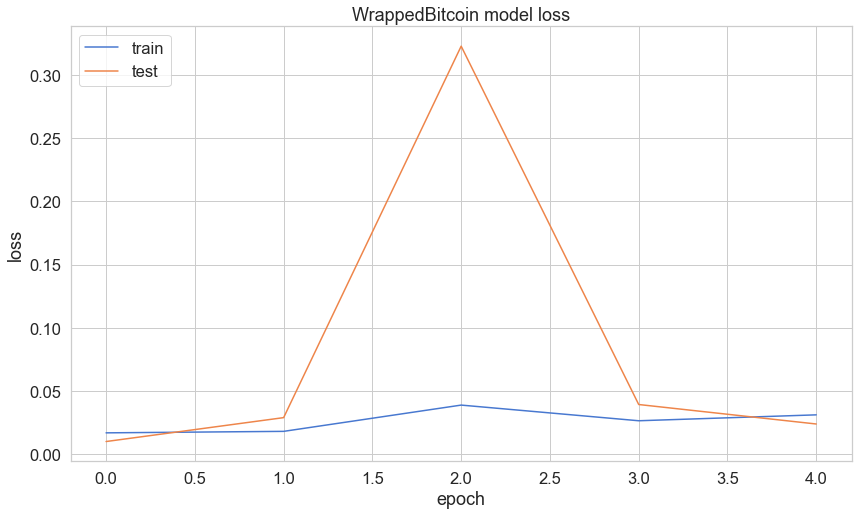

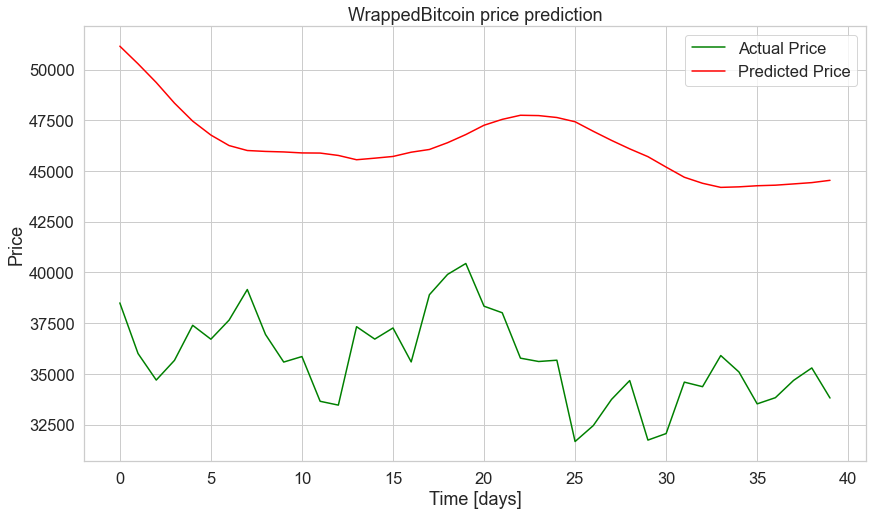







Now working on XRP


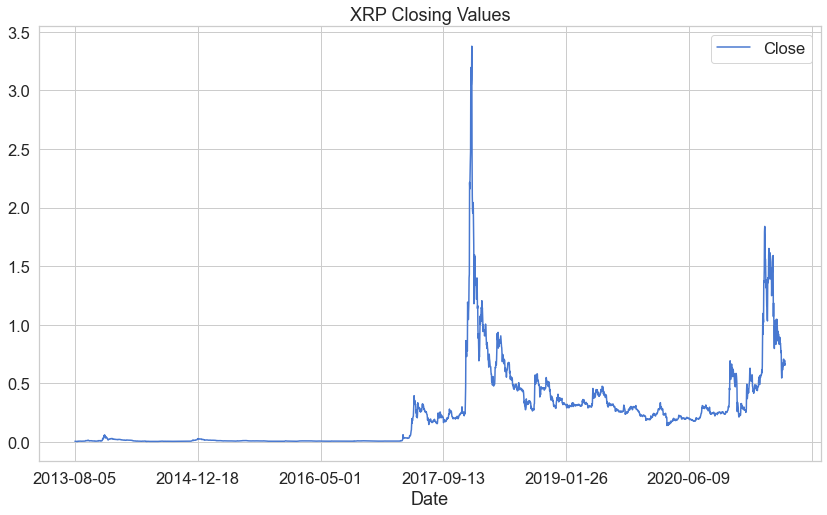

Epoch 1/5
38/38 [==============================] - 52s 1s/step - loss: 0.0034 - val_loss: 8.4778e-04
Epoch 2/5
38/38 [==============================] - 35s 920ms/step - loss: 0.0050 - val_loss: 8.8052e-04
Epoch 3/5
38/38 [==============================] - 35s 919ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 4/5
38/38 [==============================] - 35s 929ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/5
38/38 [==============================] - 36s 951ms/step - loss: 0.0012 - val_loss: 2.7255e-04


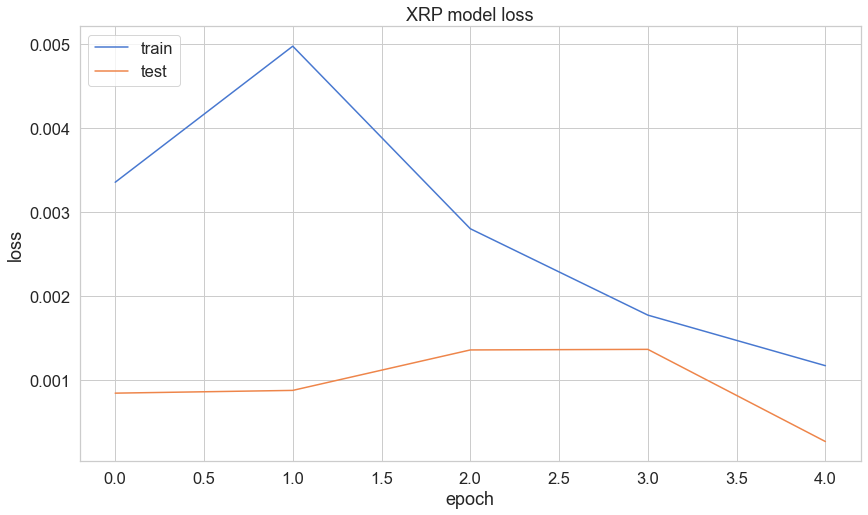

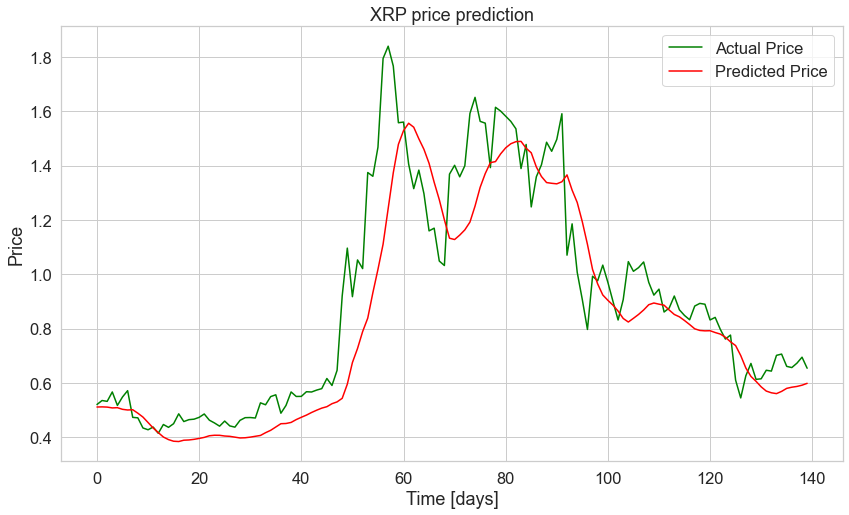

In [8]:
for x in files:
    df = pd.read_csv(x)
    name = x[:-4]
    print(f'Now working on {name}')
    show_initial_data(df, name)
    comp_train_evaluate_show(df, name)
    print("\n"*5)
    

Now working on BinanceCoin


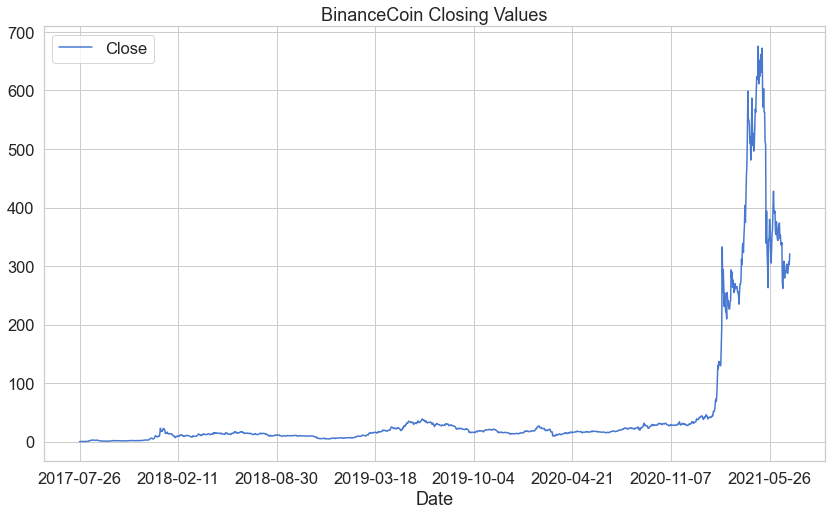







Now working on Bitcoin


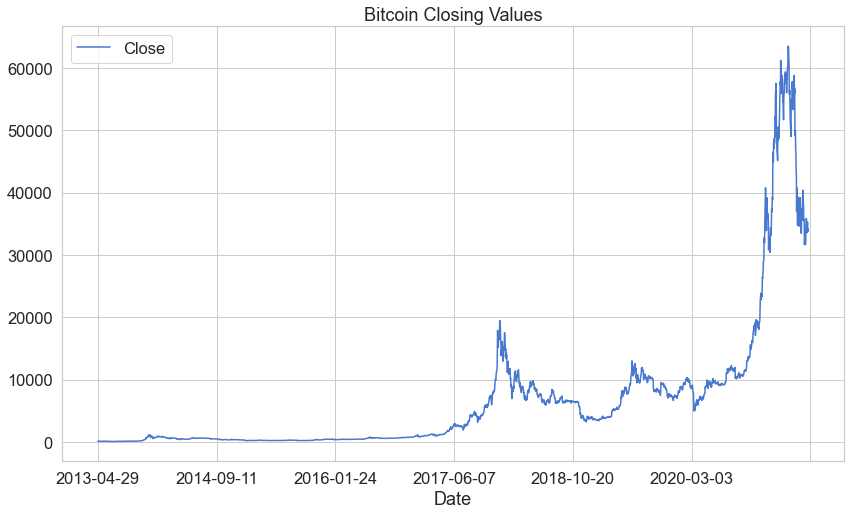







Now working on Cardano


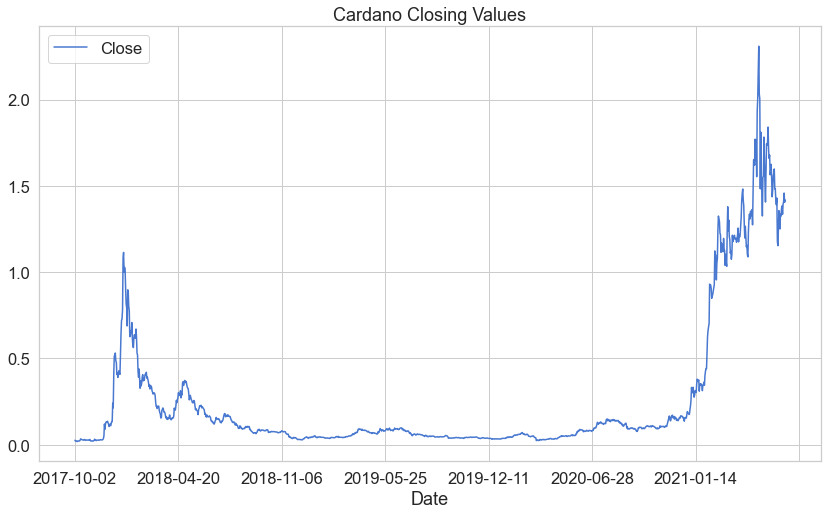







Now working on ChainLink


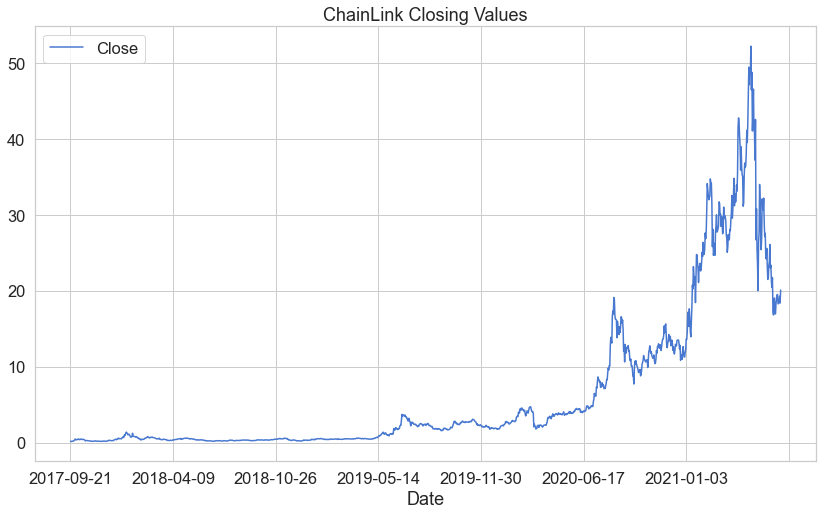







Now working on Cosmos


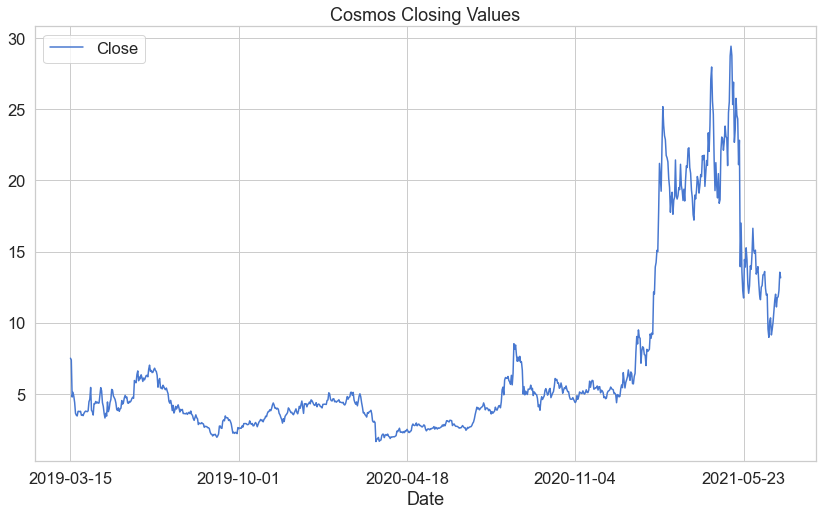







Now working on CryptocomCoin


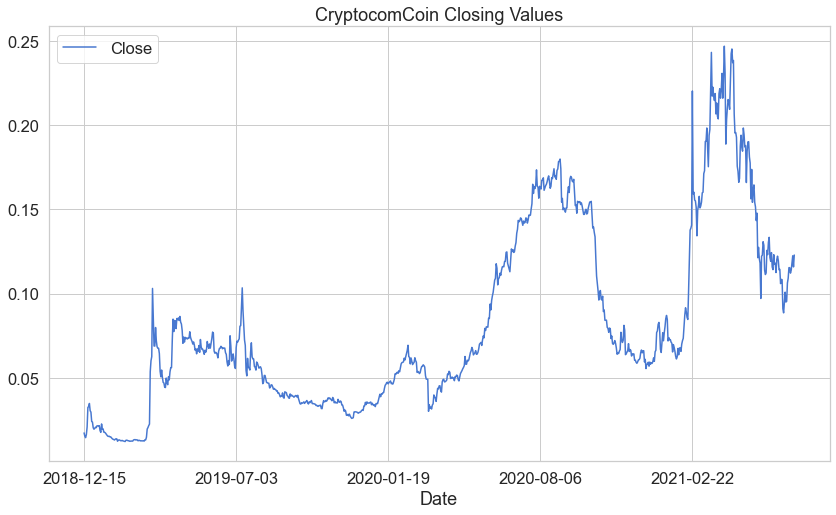







Now working on Dogecoin


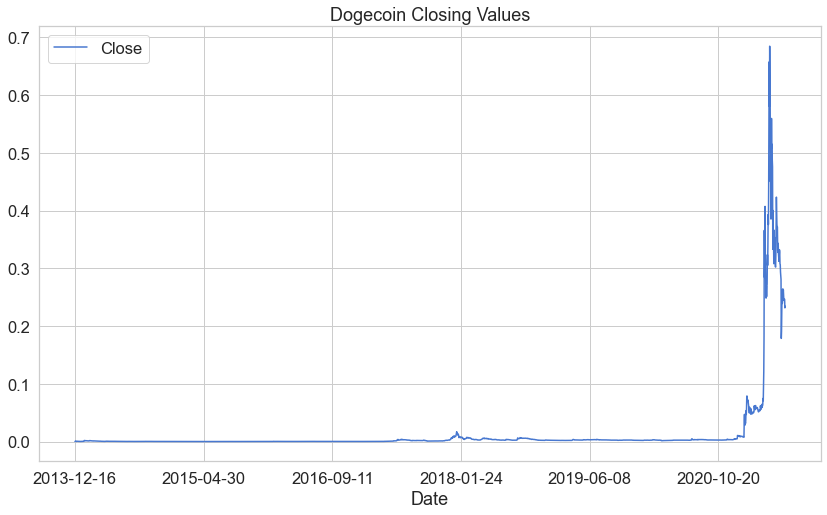







Now working on EOS


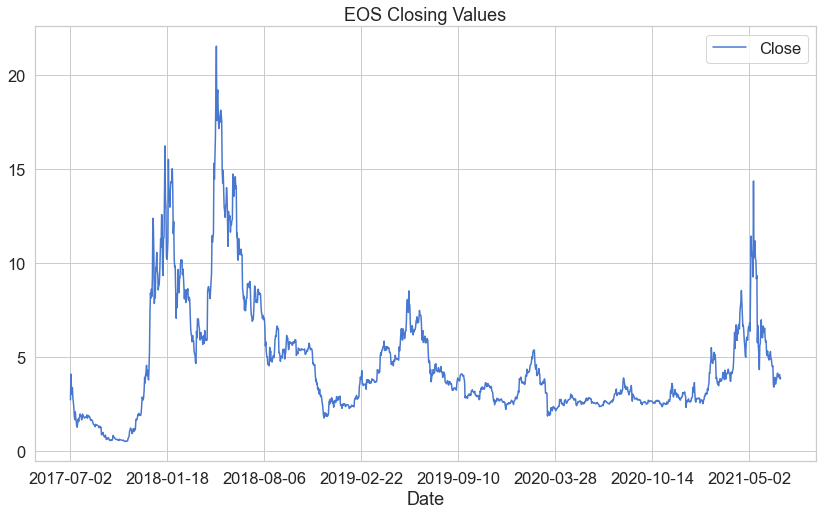







Now working on Ethereum


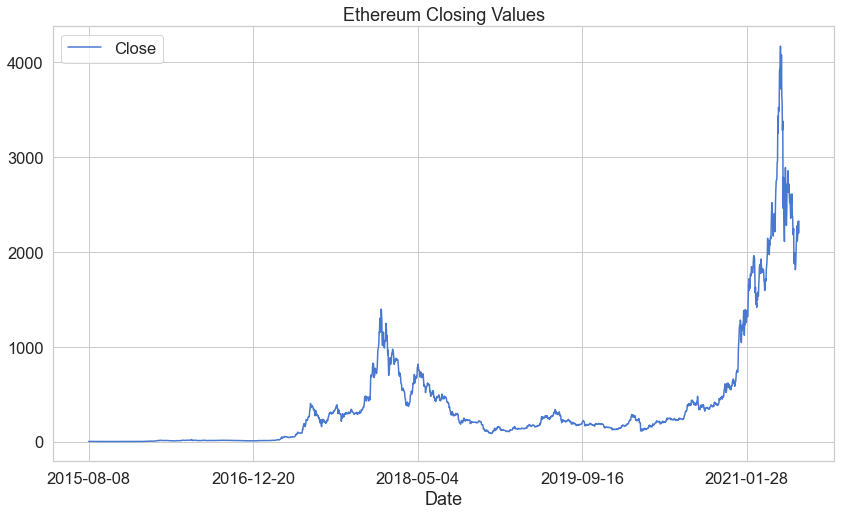







Now working on Iota


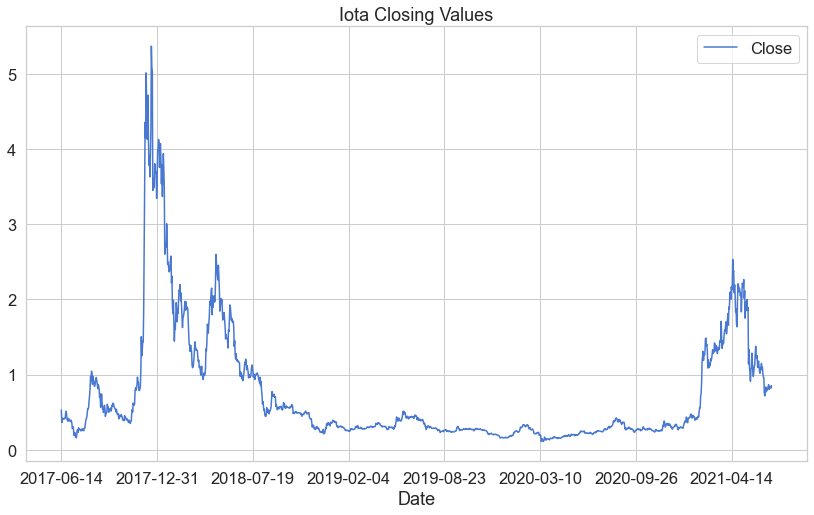







Now working on Litecoin


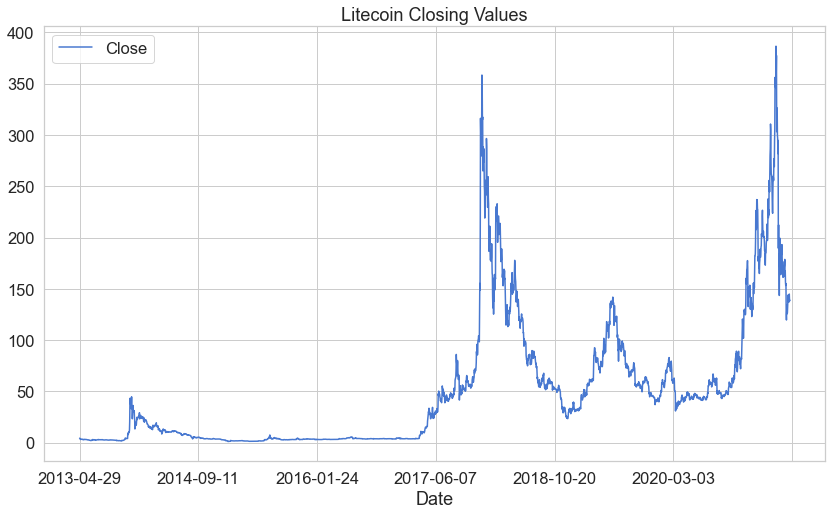







Now working on Monero


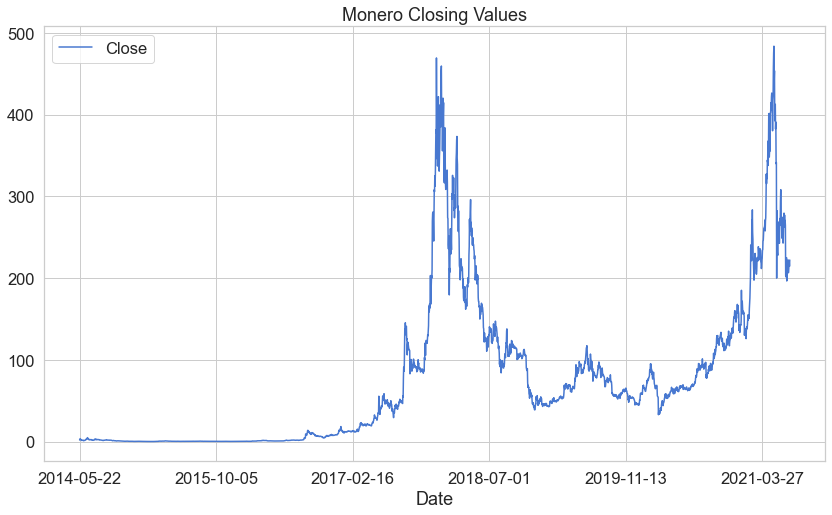







Now working on NEM


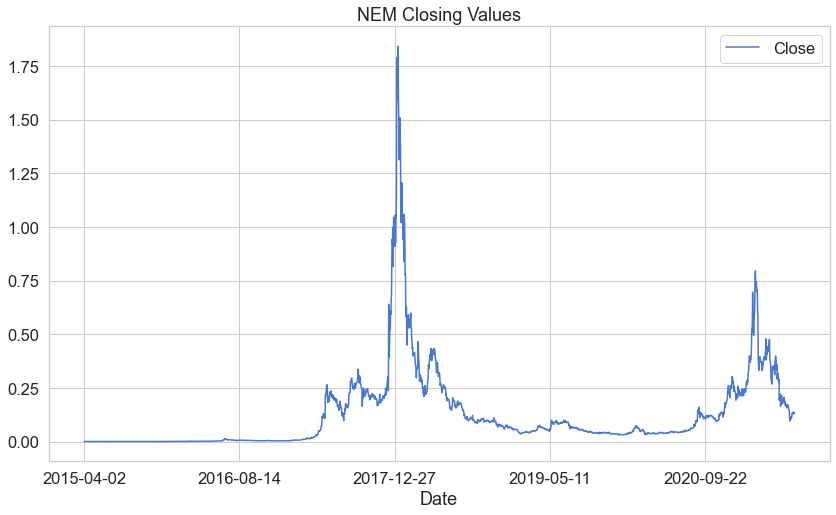







Now working on Solana


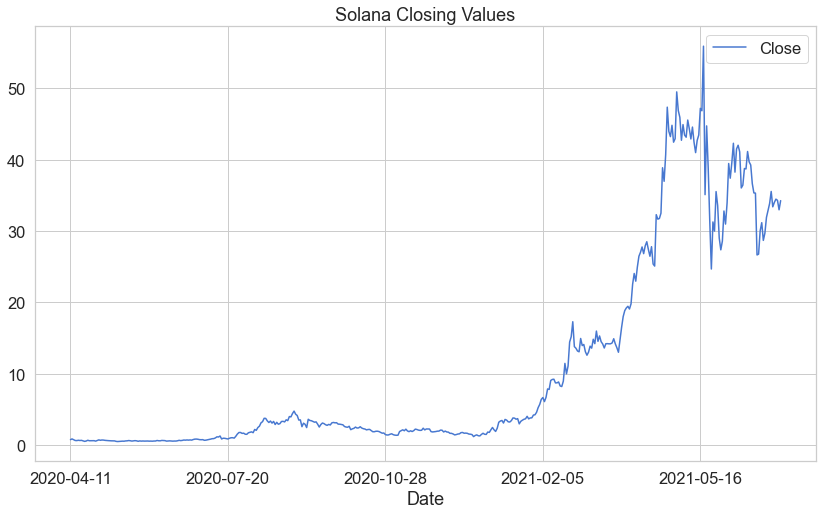







Now working on Stellar


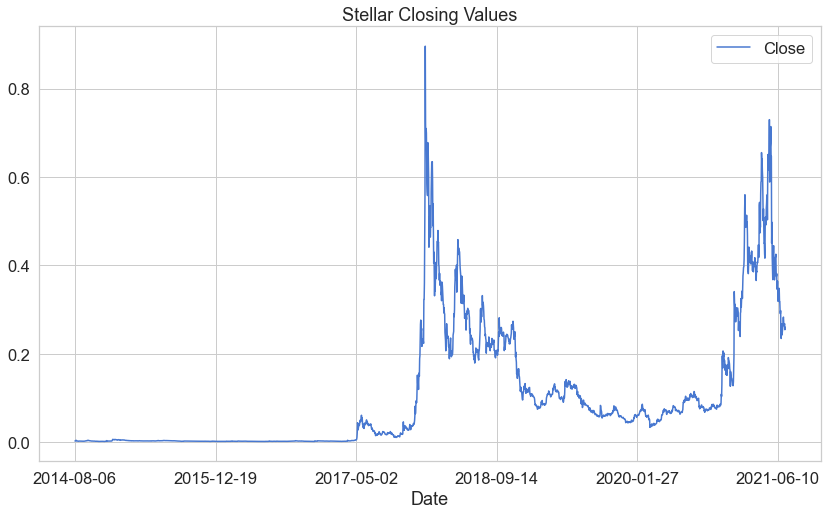







Now working on Tether


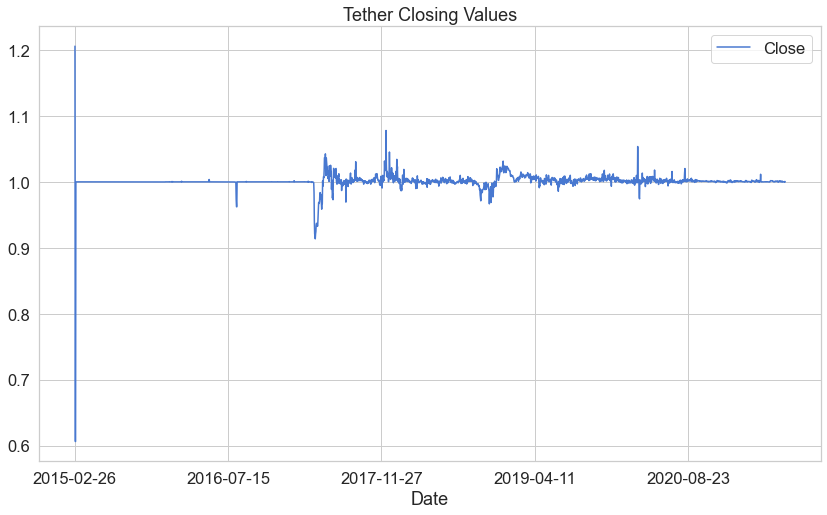







Now working on Tron


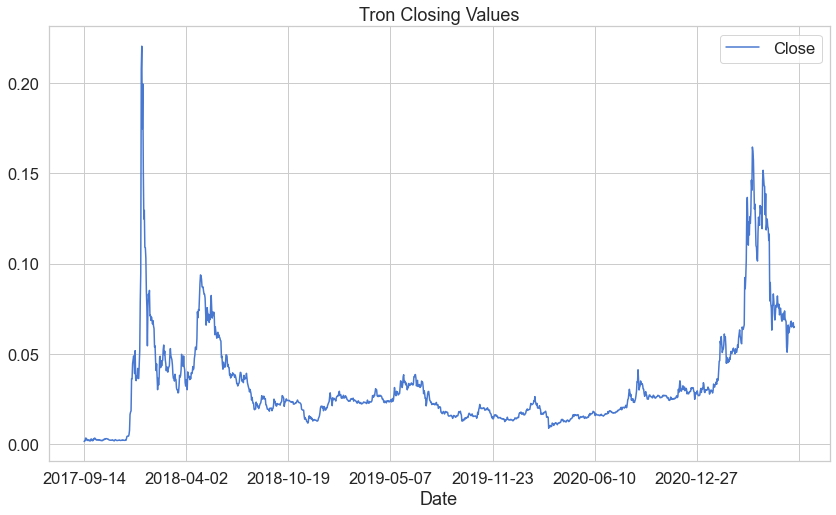







Now working on USDCoin


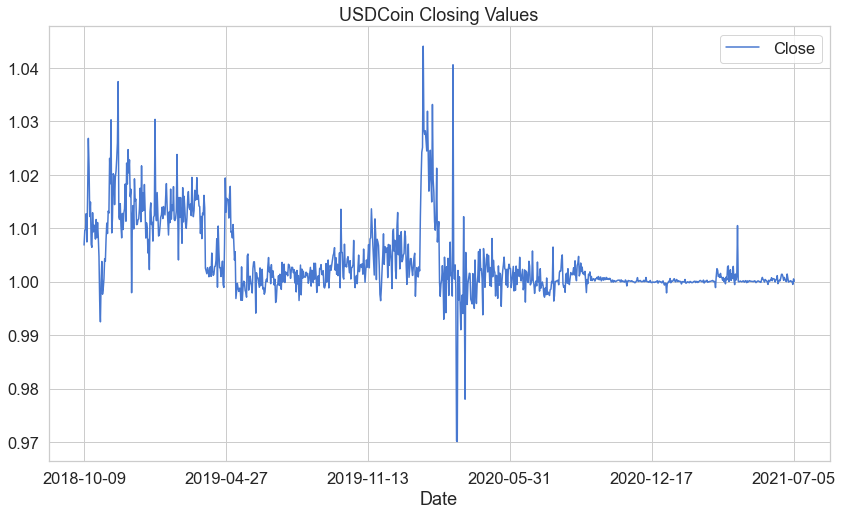







Now working on WrappedBitcoin


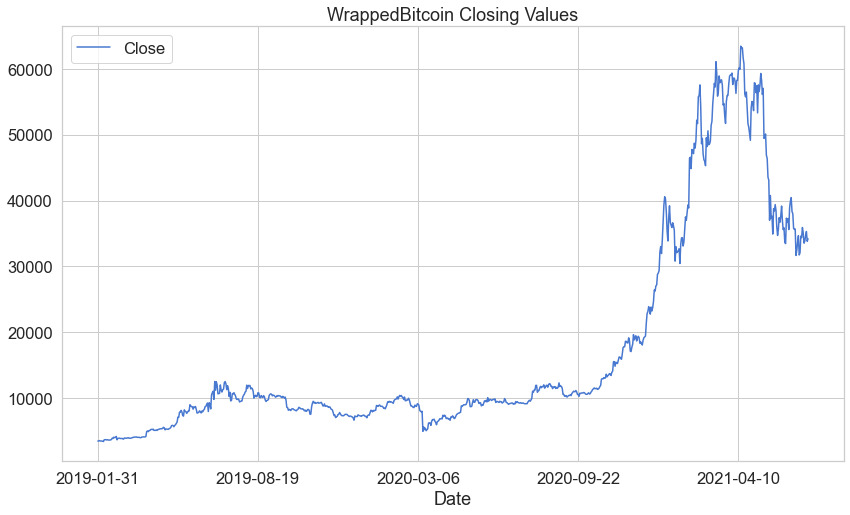







Now working on XRP


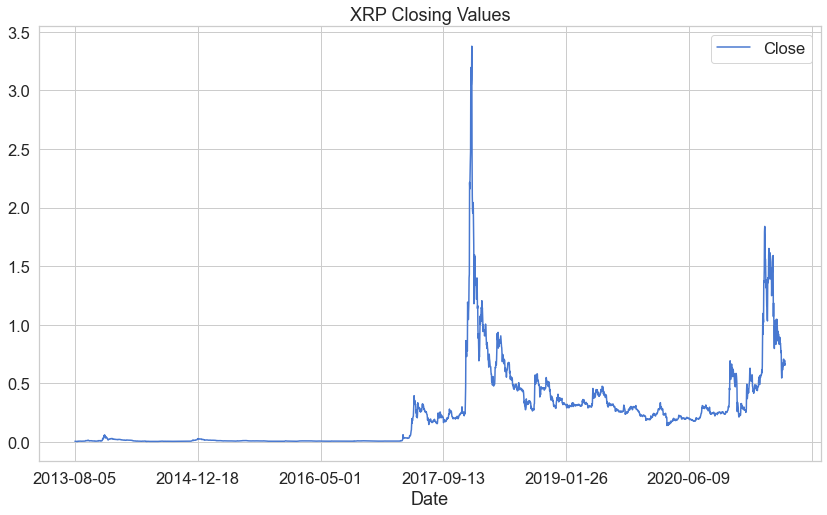

In [6]:
for x in files:
    df = pd.read_csv(x)
    name = x[:-4]
    print(f'Now working on {name}')
    show_initial_data(df, name)
    print("\n"*5)
